In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# pd.options.mode.chained_assignment = None

In [7]:
# from sklearn.linear_model import LogisticRegression

# Load data

In [8]:
pwd

'/home/ihor/anaconda_src/ks-challenge/src/main/python'

In [9]:
cd "../resources/data/"

/home/ihor/anaconda_src/ks-challenge/src/main/resources/data


In [10]:
#load dataset
tabular_data = pd.read_csv('tabular_data.csv')
#tabular_data.head(10)
print("******* train.csv report *******")
print('Shape: ', tabular_data.shape)
print('Shape w/o NaN: ', tabular_data.dropna(how='any').shape)
print('rows {:d}, unique ids: {:d}'.format(tabular_data.shape[0], tabular_data.id.nunique()))
print("NaNs in id or period:\n", tabular_data[{'id','period'}].isna().sum())
if tabular_data[{'id', 'period'}].shape[0] == tabular_data[{'id', 'period'}].drop_duplicates().shape[0]:
    print('No duplicates in id and/or period')
else:
    print('There are duplicates in id and/or period')

******* train.csv report *******
Shape:  (61272, 52)
Shape w/o NaN:  (21184, 52)
rows 61272, unique ids: 5106
NaNs in id or period:
 id        0
period    0
dtype: int64
No duplicates in id and/or period


In [11]:
tabular_data.head().to_json('./tabular.json')

In [12]:
tabular_data.columns

Index(['id', 'period', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49'],
      dtype='object')

In [13]:
ids = ['id', 'period']

In [14]:
tabular_data

id  period  feature_0  feature_1  feature_2   feature_3  feature_4  \
0         0       1      110.0       55.0   0.432017    0.000000     176.78   
1         0       2      110.0      110.0   0.397517    0.000000     315.42   
2         0       3      110.0       55.0   0.359440    0.000000     354.55   
3         0       4      110.0       55.0   0.285707    0.000000     229.98   
4         0       5      110.0       55.0   0.101487  444.730391     307.12   
...     ...     ...        ...        ...        ...         ...        ...   
61267  5105       8      110.0       77.0        NaN    0.000000      95.30   
61268  5105       9      110.0       77.0        NaN    0.000000      61.87   
61269  5105      10      110.0      106.5        NaN    0.000000      88.05   
61270  5105      11      110.0       45.0        NaN    0.000000      98.40   
61271  5105      12      110.0       35.0        NaN    0.000000      30.70   

       feature_5  feature_6  feature_7  ...  feature_40  feature_41  \
0            0.0   0.323712        NaN  ...        0.00           0   
1            0.0   0.316798        NaN  ...        0.00           0   
2            0.0   0.339188        NaN  ...        0.07           0   
3            0.0   0.415428        NaN  ...        0.00           0   
4            0.0   0.569670        NaN  ...        0.95           0   
...          ...        ...        ...  ...         ...         ...   
61267        0.0   0.094381     221.85  ...       -0.00           0   
61268        0.0   0.105878     343.22  ...        1.75           0   
61269        0.0   0.040169     259.33  ...        8.27           0   
61270        0.0   0.040810     222.00  ...        0.00           0   
61271        0.0   0.042272     285.35  ...        0.00           0   

       feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0        0.000000         0.0        55.0         2.0    0.526552       145.0   
1        0.000000         0.0       110.0         1.0    0.481063       130.0   
2        0.000000         0.0        55.0         1.0    0.509598       180.0   
3        0.000000         0.0        55.0         0.0    0.680089       142.0   
4       20.014485         0.0        55.0         0.0    0.776175        85.0   
...           ...         ...         ...         ...         ...         ...   
61267    0.000000         0.0        75.0         0.0    0.082128        43.0   
61268    0.000000         0.0        75.0         0.0    0.077594        49.0   
61269    0.000000         0.0        99.0         1.0    0.109053        43.0   
61270    0.000000         0.0         0.0         0.0    0.101929        35.0   
61271    0.000000         0.0         0.0         0.0         NaN        35.0   

       feature_48  feature_49  
0          133.28         0.0  
1          229.97         0.0  
2          231.78         0.0  
3          183.83         0.0  
4          155.83         0.0  
...           ...         ...  
61267       83.97         0.0  
61268       48.02         0.0  
61269       74.52         0.0  
61270       25.83         0.0  
61271       29.03         0.0  

[61272 rows x 52 columns]

In [15]:
#load train data
train = pd.read_csv('train.csv')
train.head(10)

id  target
0   0       0
1   1       0
2   2       1
3   3       0
4   4       1
5   5       0
6   6       1
7   7       0
8   8       1
9   9       0

In [16]:
print("******* train.csv report *******")
print('rows {:d}, unique ids: {:d}, unique targets {:d}'.format(train.shape[0], train.id.nunique(), train.target.nunique()))
print('NaN count:')
print(train.isna().sum())
val_counts = train.target.value_counts()
print('Target value counts:\n', val_counts)
print('Class_1 probability = ', val_counts[1] / val_counts.sum())

******* train.csv report *******
rows 4084, unique ids: 4084, unique targets 2
NaN count:
id        0
target    0
dtype: int64
Target value counts:
 0    3009
1    1075
Name: target, dtype: int64
Class_1 probability =  0.26322233104799214


# Cleaning and formatting

### Sign correction

In [17]:
targeted_data = pd.merge(tabular_data, train, how='left', on='id')
# column_with_negatives = 
print("Features with negatives / count of negatives:")
[(feature, targeted_data[targeted_data[feature] < 0].shape[0]) for feature in targeted_data.columns.difference({'id', 'period', 'target', 'feature_25'}) \
    if targeted_data[targeted_data[feature] < 0].shape[0] > 0]

Features with negatives / count of negatives:


[('feature_1', 1),
 ('feature_11', 2430),
 ('feature_13', 2846),
 ('feature_15', 1687),
 ('feature_21', 4),
 ('feature_22', 1),
 ('feature_23', 2718),
 ('feature_28', 2274),
 ('feature_32', 2843),
 ('feature_34', 2928),
 ('feature_40', 3276),
 ('feature_42', 1566),
 ('feature_46', 2714),
 ('feature_8', 2760)]

In [18]:
enable_sign_correction = True
features_to_correct = ['feature_8', 'feature_11', 'feature_23', 'feature_32', 'feature_34']

if enable_sign_correction:
    for feature in features_to_correct:
        tabular_data[feature] = tabular_data[feature].abs()

In [19]:
tabular_data['feature_33_div'] = 0.02 / tabular_data.feature_33
tabular_data['feature_10_minus_4'] = tabular_data.feature_10 - tabular_data.feature_4
tabular_data['feature_22_minus_20'] = tabular_data.feature_22 - tabular_data.feature_20 - tabular_data.feature_21
tabular_data['feature_22_minus_44'] = tabular_data.feature_22 - tabular_data.feature_44 - tabular_data.feature_21 
tabular_data['feature_1_minus_20'] = tabular_data.feature_22 - tabular_data.feature_44 - tabular_data.feature_21


### Delete rows with most of values absent

#### Heatmap of skipped values

Text(0.5, 1.0, 'Skipped value (yellow)')

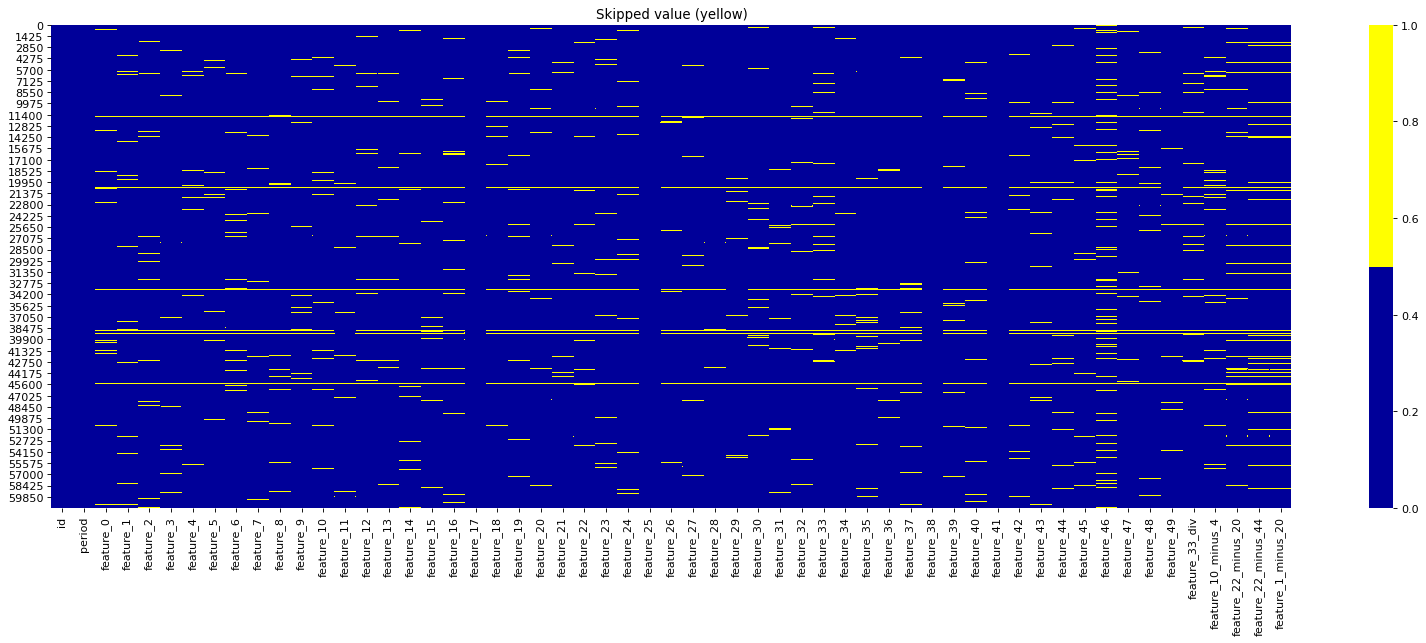

In [20]:
cols = tabular_data.columns #columns to display
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
plt.figure(num=None, figsize=(25, 8), dpi=80, facecolor='w', edgecolor='k')
colours = ['#000099', '#ffff00'] 
sns.heatmap(tabular_data[cols].isnull(), cmap=sns.color_palette(colours))
plt.title("Skipped value (yellow)")

#### Detect optimal margin of NaNs count

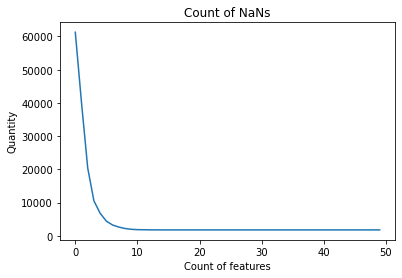

In [21]:
#there are some values with almost all features absent (except features 17, 25, 38, 41) 
#find distribution of NaN within row
#count of NaNs in each row
nans_count = tabular_data.isna().aggregate(func=sum, axis=1)

#distribution plot of NaNs quantity
nans_count_hist = pd.DataFrame({'features_count':range(0,50)})
nans_count_hist['nans_count'] = nans_count_hist.features_count.apply(lambda x: nans_count[nans_count >= x].count())
nans_count_hist['nans_count'].plot()

# Add labels
plt.title('Count of NaNs')
plt.xlabel('Count of features')
plt.ylabel('Quantity')
plt.show()

#### Delete rows over margin of NaNs count

In [22]:
nans_count_margin = 10
rows_to_delete = nans_count[nans_count >= 10].index
print("Rows to delete:\n", rows_to_delete)
print("Total rows before: ", tabular_data.shape[0])
tabular_data = tabular_data.drop(index=rows_to_delete, errors='ignore')
print("Total rows after: ", tabular_data.shape[0])

Rows to delete:
 Int64Index([   39,    40,    41,    42,    43,    44,    45,    46,    47,
              135,
            ...
            60704, 60705, 60706, 60707, 61014, 61015, 61016, 61017, 61018,
            61019],
           dtype='int64', length=1831)
Total rows before:  61272
Total rows after:  59441


### Encode object values (feature_25)

In [23]:
df_to_encode = tabular_data
print('Object features:')
features_to_encode = df_to_encode.dtypes[df_to_encode.dtypes == 'O'].drop(columns=ids).index
features_to_encode

Object features:


Index(['feature_25'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#NaN should be encoded as another value
encoded_data = df_to_encode
for feature in features_to_encode:
    encoded_data[feature + "_encoded"] = le.fit_transform(df_to_encode[feature].fillna('__NaN__'))
    print(feature + " has been encoded")
encoded_data = encoded_data.drop(columns=features_to_encode, errors='ignore')   
# encoded_data

feature_25 has been encoded


### Delete splashes

In [25]:
splashes_margin = 0.03
splashed_data = encoded_data

unsplashed_data = splashed_data[splashed_data.columns.drop(['id', 'period'])]
mean_std = pd.DataFrame({'mean':splashed_data.mean(), 
                         'std':splashed_data.std(),
                         'q_left':splashed_data.quantile(q=splashes_margin, interpolation='lower'),
                         'q_right':splashed_data.quantile(q=1-splashes_margin, interpolation='higher'),
                         'q_left_10':splashed_data.quantile(q=0.1, interpolation='lower'),
                         'q_right_10':splashed_data.quantile(q=1-0.1, interpolation='higher')
                         })
mean_std['m_left'] = mean_std['mean'] - 3*mean_std['std']
mean_std['m_right'] = mean_std['mean'] + 3*mean_std['std']

mean_std['mean_10'] = splashed_data[(splashed_data >= mean_std['q_left_10']) & (splashed_data <= mean_std['q_right_10'])].mean() 
mean_std['std_10'] = splashed_data[(splashed_data >= mean_std['q_left_10']) & (splashed_data <= mean_std['q_right_10'])].std() 

mean_std['ms_10_left'] = mean_std['mean_10'] - 3*mean_std['std_10']
mean_std['ms_10_right'] = mean_std['mean_10'] + 3*mean_std['std_10'] 

#cut splashes based on 3*sigma
# unsplashed_data = splashed_data[{'id', 'period'}] \
#     .join(unsplashed_data[ (unsplashed_data > mean_std['m_left']) & (unsplashed_data < mean_std['m_right']) ])

#cut splashes based on 3% lower/upper quantiles
# unsplashed_data = splashed_data[{'id', 'period'}] \
#     .join(unsplashed_data[ (unsplashed_data >= mean_std['q_left']) & (unsplashed_data <= mean_std['q_right']) ])

#cut splashes based on 3*sigma of central 80% values
unsplashed_data = splashed_data[{'id', 'period'}] \
    .join(unsplashed_data[ (unsplashed_data >= mean_std['ms_10_left']) & (unsplashed_data <= mean_std['ms_10_right']) ])

mean_std

# df = unsplashed_data['feature_5']
# q_left = df.quantile(q=0.1, interpolation='lower')
# q_right = df.quantile(q=0.9, interpolation='higher')
# m = df[ (df >= q_left) & (df <= q_right)].mean()
# s = df[ (df >= q_left) & (df <= q_right)].std()

# size_before = df.shape[0]
# size_q = df[ (df >= q_left) & (df <= q_right)].shape[0]
# size_ms = df[(df > m - 3*s ) & (df < m + 3*s)].shape[0]
# print(size_before, size_q, size_ms)
# print(df.max(), df[ (df >= q_left) & (df <= q_right)].max(), df[(df > m - 3*s ) & (df < m + 3*s)].max())

mean           std        q_left       q_right  \
id                   2554.924059   1475.274645  1.510000e+02   4953.000000   
period                  6.432664      3.452793  1.000000e+00     12.000000   
feature_0             110.070121      0.461243  1.100000e+02    111.000000   
feature_1              87.139686     95.516481  0.000000e+00    260.000000   
feature_2               0.301926      0.735892  8.647000e-03      0.677727   
feature_3            2999.489766  11214.876331  0.000000e+00  22136.633458   
feature_4             414.922953    524.412391  0.000000e+00   1669.780000   
feature_5            1463.145264   7346.834257  0.000000e+00  12872.733646   
feature_6               0.572980      0.728868  1.919400e-02      0.998838   
feature_7             391.367133    436.404314  0.000000e+00   1431.750000   
feature_8             138.836059    132.259092  1.000000e+00    449.000000   
feature_9             111.654628    651.203223  0.000000e+00    205.450000   
feature_10            388.949653    512.400110  0.000000e+00   1621.330000   
feature_11            997.605153   6116.388107  0.000000e+00    357.000000   
feature_12              0.287932      0.111644  8.516800e-02      0.492779   
feature_13              0.050515      0.087221 -1.470800e-02      0.265489   
feature_14              3.152552     24.537179  0.000000e+00     20.000000   
feature_15             10.823405     14.114635  0.000000e+00     31.000000   
feature_16            353.029031   2370.451085  0.000000e+00     82.000000   
feature_17              0.499763      0.289260  3.218930e-02      0.970571   
feature_18            417.711649    445.917476  3.700000e-01   1473.820000   
feature_19              0.227278      0.111599  4.131400e-02      0.415701   
feature_20             70.285873     60.750876  0.000000e+00    200.000000   
feature_21             11.890880     54.745497  0.000000e+00     80.000000   
feature_22            930.203238   5881.130582  0.000000e+00    362.800000   
feature_23             31.102632     35.348627  0.000000e+00    116.000000   
feature_24              3.094001     24.018467  0.000000e+00     19.000000   
feature_26            100.431957    119.493589  0.000000e+00    368.000000   
feature_27              4.868071     12.751015  0.000000e+00     36.350000   
feature_28             20.653139     45.392512 -2.830000e+00    125.600000   
feature_29           1803.898971  11797.252904  0.000000e+00    395.500000   
feature_30            131.621097    150.045058  0.000000e+00    472.000000   
feature_31           2962.263349   1721.929152  1.890000e+02   5759.000000   
feature_32            148.803402    161.269699  0.000000e+00    518.000000   
feature_33              0.231425      0.161398  1.663100e-02      0.540475   
feature_34             96.644812     56.541834  6.000000e+00    188.000000   
feature_35           1478.017165   8257.479969  0.000000e+00  10139.687518   
feature_36            100.294004    147.113504  0.000000e+00    457.780000   
feature_37              4.937888     25.537916  0.000000e+00     60.000000   
feature_38              0.025657      0.128030  0.000000e+00      0.416756   
feature_39              2.865163     28.317093  0.000000e+00     17.680000   
feature_40              2.388112     12.297105 -3.000000e-02     16.180000   
feature_41              0.000000      0.000000  0.000000e+00      0.000000   
feature_42            450.525495   2782.090176  0.000000e+00   3955.759625   
feature_43              1.091447      2.986885  0.000000e+00      9.000000   
feature_44             70.063842     60.528638  0.000000e+00    200.000000   
feature_45             12.623742     22.802515  0.000000e+00     68.000000   
feature_46              0.420096      0.402734 -3.361320e-01      0.982838   
feature_47            125.481952    124.010729  0.000000e+00    416.000000   
feature_48            289.051454    381.139186  0.000000e+00   1207.370000   
feature_49             61.034482    337.652891  0.

In [26]:
def plot_test(input_data):
    for feature in ['feature_5', 'feature_11', 'feature_25_encoded']:

        plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    #     ax = plt.subplot(4, 1, i + 1)
        sns.distplot(input_data[feature], hist = True, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = '!driver',
                         bins=min(input_data[feature].nunique(), 100))

        plt.legend(prop={'size': 16}, title = 'Target class')
        plt.title([feature])
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.show()

# # plot_test(unsplashed2_data)
# plot_test(unsplashed_data)
# plot_test(splashed_data)

### Delete nonsignificants columns

#### Make data report

In [27]:
nonsignifican_margin = 0.05

#TIME CONSUMING! (because of nunique)
#count uniques and check for data types
#NaN is not unique value!
#Look for object - it's categorial, so should be converted to dummies
input_data = unsplashed_data
tabular_data_report = pd.DataFrame({'dtypes':input_data.dtypes,
                                    'nunique':input_data.nunique(), 
                                    'nan_count':input_data.isna().sum(),
                                    'm_left':input_data.quantile(q= nonsignifican_margin, interpolation='lower'),
                                    'm2_left':input_data.quantile(q= 2*nonsignifican_margin, interpolation='lower'),
                                    'm2_right':input_data.quantile(q= 1 - 2*nonsignifican_margin, interpolation='higher'),                                    
                                    'm_right':input_data.quantile(q= 1 - nonsignifican_margin, interpolation='higher'),
                                    '5%':input_data.quantile(q=0.05),
                                    '10%':input_data.quantile(q=0.10),
                                    '90%':input_data.quantile(q=0.90),
                                    '95%':input_data.quantile(q=0.95)
                                   })
tabular_data_report = tabular_data_report.join(input_data.describe().transpose()) \
    .drop(['id', 'period'])
tabular_data_report

dtypes  nunique  nan_count        m_left     m2_left  \
feature_0            float64        1       2955  1.100000e+02  110.000000   
feature_1            float64     8197       4670  0.000000e+00    0.000000   
feature_2            float64    51703       5068  1.261300e-02    0.023547   
feature_3            float64    25127       8661  0.000000e+00    0.000000   
feature_4            float64    29818       6011  3.000000e-02    1.920000   
feature_5            float64     3927       8771  0.000000e+00    0.000000   
feature_6            float64    55248       2846  3.668159e-02    0.086029   
feature_7            float64    30382       6028  1.900000e+00   17.930000   
feature_8            float64      337       5334  3.000000e+00   13.000000   
feature_9            float64     3317       8296  0.000000e+00    0.000000   
feature_10           float64    28773       6223  0.000000e+00    0.700000   
feature_11           float64     8183       5569  0.000000e+00    0.000000   
feature_12           float64    53264       3422  1.112200e-01    0.140748   
feature_13           float64    40349       8090  2.260000e-04    0.001099   
feature_14           float64        3       9203  0.000000e+00    0.000000   
feature_15           float64       58       1914  0.000000e+00    0.000000   
feature_16           float64        6       8293  0.000000e+00    0.000000   
feature_17           float64    59441          0  5.188523e-02    0.100847   
feature_18           float64    31389       5931  4.480000e+00   25.430000   
feature_19           float64    54698       1890  5.508200e-02    0.079910   
feature_20           float64     5577       3726  0.000000e+00    0.000000   
feature_21           float64     1601       8222  0.000000e+00    0.000000   
feature_22           float64     8256       5462  0.000000e+00    0.000000   
feature_23           float64       82       5885  0.000000e+00    0.000000   
feature_24           float64        3       8806  0.000000e+00    0.000000   
feature_26           float64      259       5444  0.000000e+00    1.000000   
feature_27           float64      658       8737  0.000000e+00    0.000000   
feature_28           float64     4191       8363  0.000000e+00    0.000000   
feature_29           float64     3499       5095  0.000000e+00    0.000000   
feature_30           float64      340       5492  0.000000e+00    2.000000   
feature_31           float64     6596       1163  3.240000e+02  654.000000   
feature_32           float64      377       5625  1.000000e+00    5.000000   
feature_33           float64    54572       2557  2.229800e-02    0.035546   
feature_34           float64      234       1132  1.000000e+01   21.000000   
feature_35           float64    20873       8963  0.000000e+00    0.000000   
feature_36           float64    12806       6704  0.000000e+00    0.000000   
feature_37           float64        1       5910  0.000000e+00    0.000000   
feature_38           float64        1       3057  0.000000e+00    0.000000   
feature_39           float64        4       7310  0.000000e+00    0.000000   
feature_40           float64      733       8824 -1.000000e-02    0.000000   
feature_41             int64        1          0  0.000000e+00    0.000000   
feature_42           float64    21634       9202  0.000000e+00    0.000000   
feature_43           float64        3       8046  0.000000e+00    0.000000   
feature_44           float64     5576       3587  0.000000e+00    0.000000   
feature_45           float64       31       7739  0.000000e+00    0.000000   
feature_46           float64    51630       7764  5.613626e-03    0.021173   
feature_47           float64      311       5290  2.000000e+00    9.000000   
feature_48           float64    25350       6075  0.000000e+00    0.400000   
feature_49           float64       31       8160  0.000000e+00    0.000000   
feature_33_div       float64    49192       8368  3.869992e-02    0.042785   
feature_10_minus_4   float64    16291       

#### Find nonsignificant features (only single value inside margins)

In [28]:
print("Nonsignificant features:")
nonsignificants = tabular_data_report[ (tabular_data_report['nunique'] <= 1) |
                     (tabular_data_report.m_left == tabular_data_report.m_right) | 
                     (tabular_data_report['min'] == tabular_data_report.m2_right) | 
                     (tabular_data_report.m2_left == tabular_data_report['max']) ]
nonsignificants

Nonsignificant features:


dtypes  nunique  nan_count  m_left  m2_left  m2_right  \
feature_0   float64        1       2955   110.0    110.0     110.0   
feature_5   float64     3927       8771     0.0      0.0       0.0   
feature_37  float64        1       5910     0.0      0.0       0.0   
feature_38  float64        1       3057     0.0      0.0       0.0   
feature_39  float64        4       7310     0.0      0.0       0.0   
feature_41    int64        1          0     0.0      0.0       0.0   

               m_right     5%    10%    90%         95%    count        mean  \
feature_0   110.000000  110.0  110.0  110.0  110.000000  56486.0  110.000000   
feature_5    59.282228    0.0    0.0    0.0   59.243376  50670.0   20.499194   
feature_37    0.000000    0.0    0.0    0.0    0.000000  53531.0    0.000000   
feature_38    0.000000    0.0    0.0    0.0    0.000000  56384.0    0.000000   
feature_39    0.000000    0.0    0.0    0.0    0.000000  52131.0    0.000415   
feature_41    0.000000    0.0    0.0    0.0    0.000000  59441.0    0.000000   

                   std    min    25%    50%    75%        max  
feature_0     0.000000  110.0  110.0  110.0  110.0  110.00000  
feature_5   104.886274    0.0    0.0    0.0    0.0  954.71844  
feature_37    0.000000    0.0    0.0    0.0    0.0    0.00000  
feature_38    0.000000    0.0    0.0    0.0    0.0    0.00000  
feature_39    0.003244    0.0    0.0    0.0    0.0    0.05000  
feature_41    0.000000    0.0    0.0    0.0    0.0    0.00000

In [29]:
#delete nonsignificant: 
cleaned_data = input_data.drop(columns=nonsignificants.index, errors='ignore')
cleaned_data.columns

Index(['id', 'period', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_40', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_33_div', 'feature_10_minus_4', 'feature_22_minus_20',
       'feature_22_minus_44', 'feature_1_minus_20', 'feature_25_encoded'],
      dtype='object')

In [30]:
#stub for export to Excel
#Excel requires ";" separator
#tabular_data_report.to_csv('tabular_data_report.csv', index=True)

### Merge with train data

In [31]:
#merge train data to dataset
targeted_data = pd.merge(cleaned_data, train, how='left', on='id')

### Combine correlated features

In [32]:
#calculate Pearson correlations
data_to_combine = targeted_data
data_corr = data_to_combine[data_to_combine.target.isna() != True].corr(method='pearson')

In [33]:
#print the most correlated pairs 
margin = 0.8
correlation_report = pd.DataFrame(columns=['column_a', 'column_b', 'column_a_index', 'column_b_index',
                                          'correlation', 'a_nans_count', 'b_nans_count', 'both_is_nan_count'])
for r in range(1, data_corr.shape[0]-1):
    for c in range(0, r-1):
        if (data_corr.iloc[r][c] > margin) or (data_corr.iloc[r][c] < -margin):
            print(data_corr.columns[c], "=", data_corr.columns[r], 
                  ' (columns {:d}:{:d}, correlation={:.3f})'.format(c, r, data_corr.iloc[r][c]))
            correlation_report = correlation_report.append({
                'column_a':data_corr.columns[c],
                'column_b':data_corr.columns[r],
                'column_a_index':c,
                'column_b_index':r,
                'correlation':data_corr.iloc[r][c],
#                 'both_is_nan_count':data_to_combine.iloc[:, r].isna().combine(data_to_combine.iloc[:, c].isna(), 
#                                                                      lambda s1, s2: s1 and s2).sum(),
                'a_nans_count':data_to_combine.iloc[:, c].isna().sum(),
                'b_nans_count':data_to_combine.iloc[:, r].isna().sum()
                }, ignore_index=True)
print("Completed")
#' both is NaN:', 

feature_4 = feature_10  (columns 5:10, correlation=0.988)
feature_1 = feature_11  (columns 2:11, correlation=0.978)
feature_7 = feature_18  (columns 7:18, correlation=0.986)
feature_2 = feature_19  (columns 3:19, correlation=0.813)
feature_1 = feature_20  (columns 2:20, correlation=0.887)
feature_11 = feature_20  (columns 11:20, correlation=0.915)
feature_1 = feature_22  (columns 2:22, correlation=1.000)
feature_11 = feature_22  (columns 11:22, correlation=0.977)
feature_20 = feature_22  (columns 20:22, correlation=0.883)
feature_23 = feature_26  (columns 23:25, correlation=0.819)
feature_23 = feature_30  (columns 23:29, correlation=0.882)
feature_26 = feature_30  (columns 25:29, correlation=0.988)
feature_23 = feature_32  (columns 23:31, correlation=0.860)
feature_26 = feature_32  (columns 25:31, correlation=0.965)
feature_30 = feature_32  (columns 29:31, correlation=0.976)
feature_2 = feature_33  (columns 3:32, correlation=-0.864)
feature_19 = feature_33  (columns 19:32, correlation=

In [34]:
correlation_report.sort_values(by='correlation')

column_a            column_b column_a_index column_b_index  \
31            feature_9  feature_10_minus_4              9             46   
16           feature_19          feature_33             19             32   
15            feature_2          feature_33              3             32   
30           feature_33      feature_33_div             32             45   
3             feature_2          feature_19              3             19   
9            feature_23          feature_26             23             25   
20           feature_14          feature_43             14             38   
18            feature_4          feature_36              5             35   
12           feature_23          feature_32             23             31   
19           feature_10          feature_36             10             35   
29            feature_2      feature_33_div              3             45   
10           feature_23          feature_30             23             29   
8            feature_20          feature_22             20             22   
25           feature_22          feature_44             22             39   
4             feature_1          feature_20              2             20   
22            feature_1          feature_44              2             39   
21           feature_16          feature_43             16             38   
5            feature_11          feature_20             11             20   
23           feature_11          feature_44             11             39   
13           feature_26          feature_32             25             31   
27            feature_4          feature_48              5             43   
14           feature_30          feature_32             29             31   
7            feature_11          feature_22             11             22   
1             feature_1          feature_11              2             11   
26            feature_8          feature_47              8             42   
28           feature_10          feature_48             10             43   
2             feature_7          feature_18              7             18   
11           feature_26          feature_30             25             29   
0             feature_4          feature_10              5             10   
17           feature_31          feature_34             30             33   
6             feature_1          feature_22              2             22   
24           feature_20          feature_44             20             39   
32  feature_22_minus_20  feature_1_minus_20             47             49   

    correlation a_nans_count b_nans_count  both_is_nan_count  
31    -0.922036         8296         8892                NaN  
16    -0.886554         1890         2557                NaN  
15    -0.863590         5068         2557                NaN  
30    -0.811342         2557         8368                NaN  
3      0.813089         5068         1890                NaN  
9      0.819130         5885         5444                NaN  
20     0.826231         9203         8046                NaN  
18     0.853447         6011         6704                NaN  
12     0.859734         5885         5625                NaN  
19     0.867047         6223         6704                NaN  
29     0.877300         5068         8368                NaN  
10     0.882423         5885         5492                NaN  
8      0.882924         3726         5462                NaN  
25     0.883224         5462         3587                NaN  
4      0.887474         4670         3726                NaN  
22     0.887826         4670         3587                NaN  
21     0.891913         8293         8046                NaN  
5      0.915494         5569         3726                NaN  
23     0.915713         5569         3587                NaN  
13     0.965001         5444         5625                NaN  
27     0.971479         6011         6075                NaN  
14     0.9

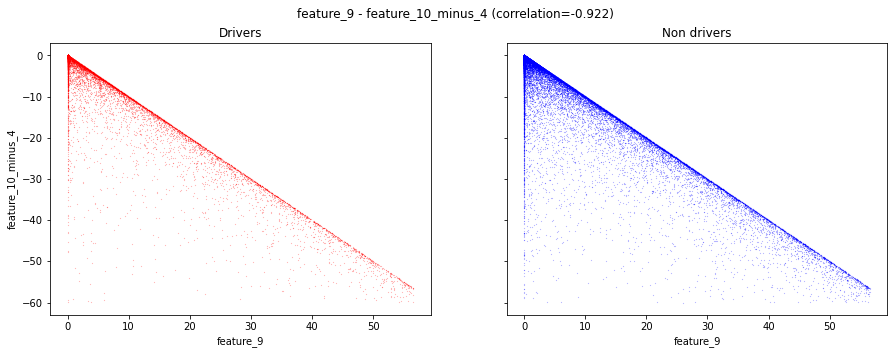

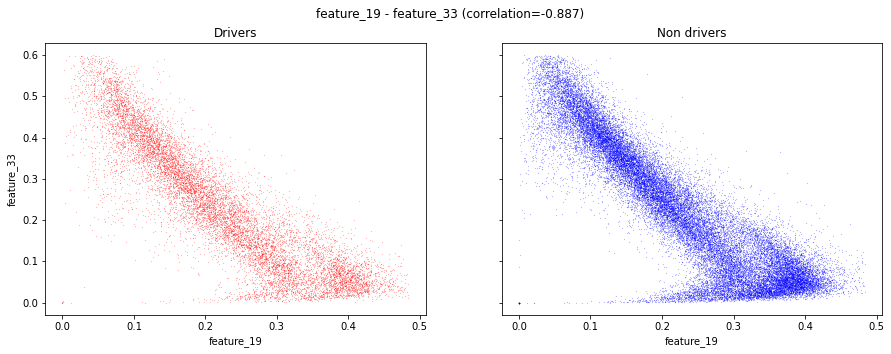

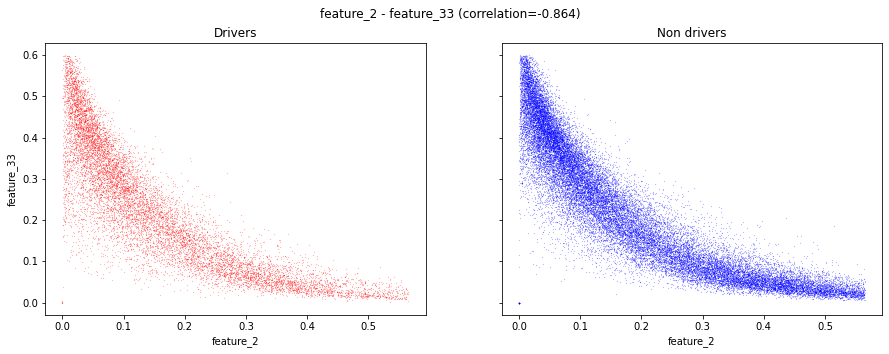

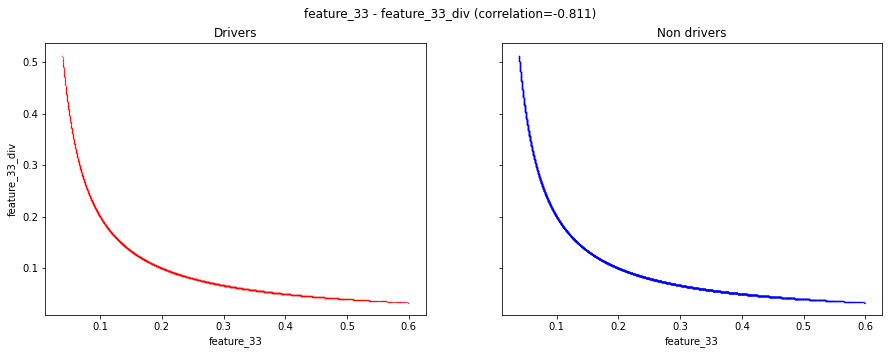

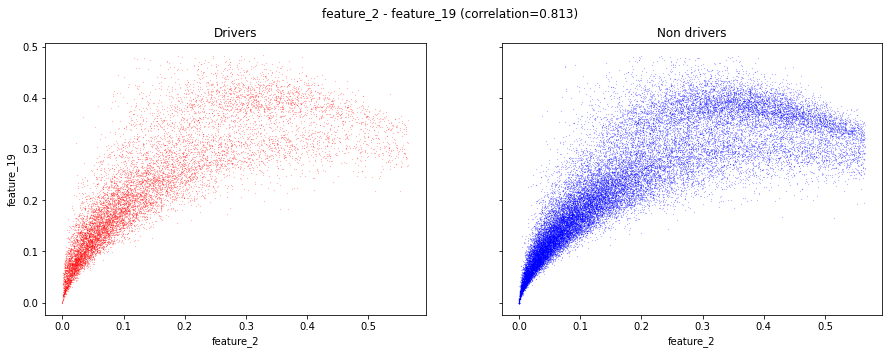

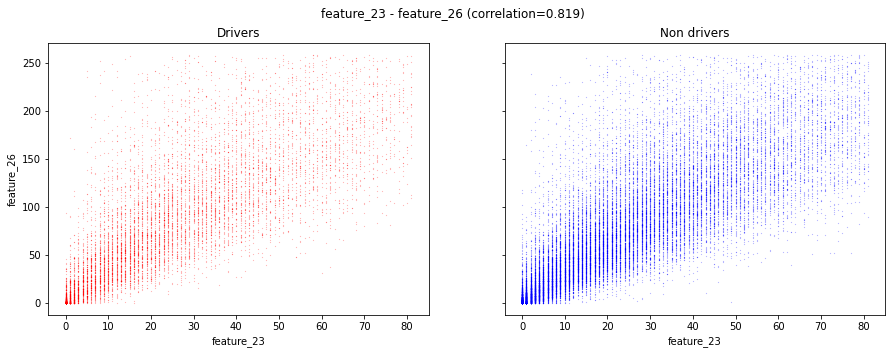

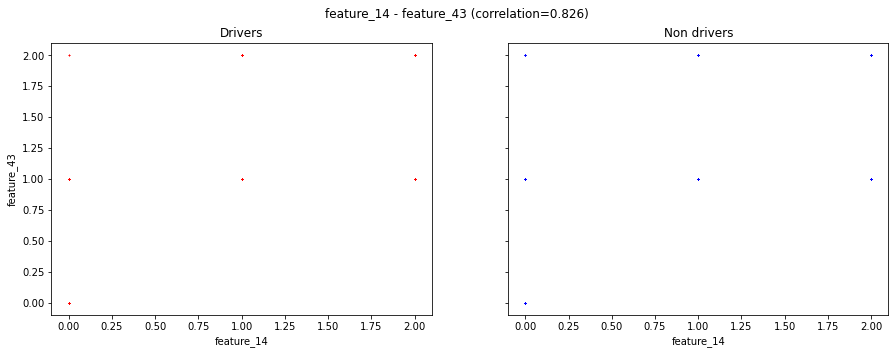

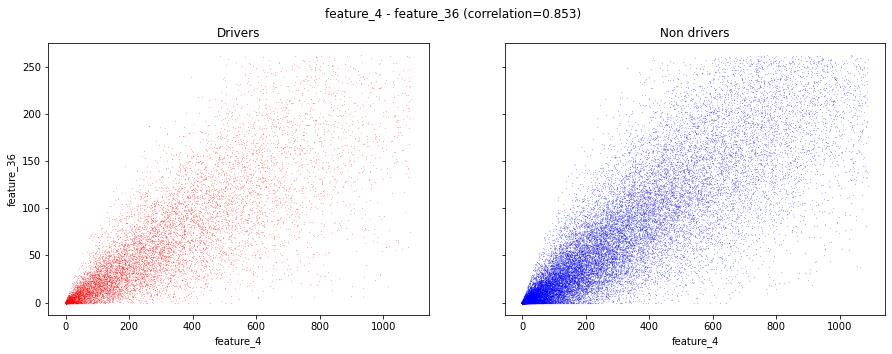

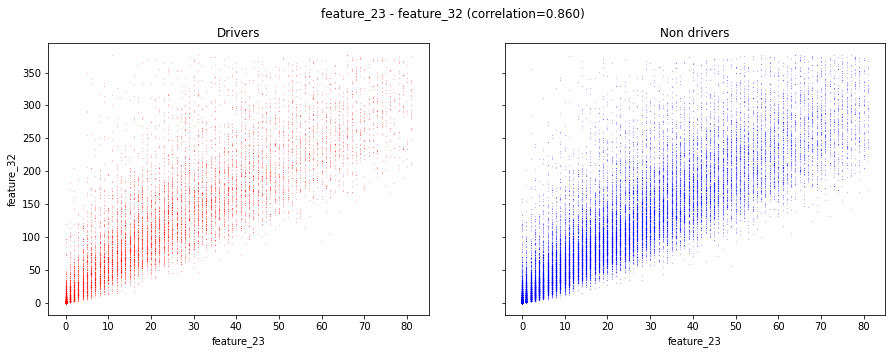

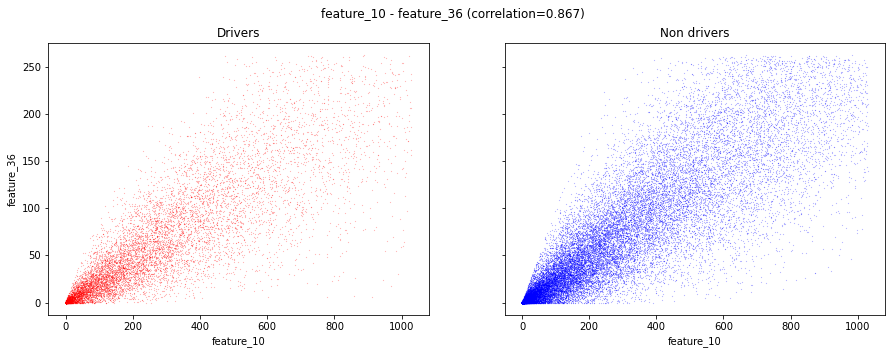

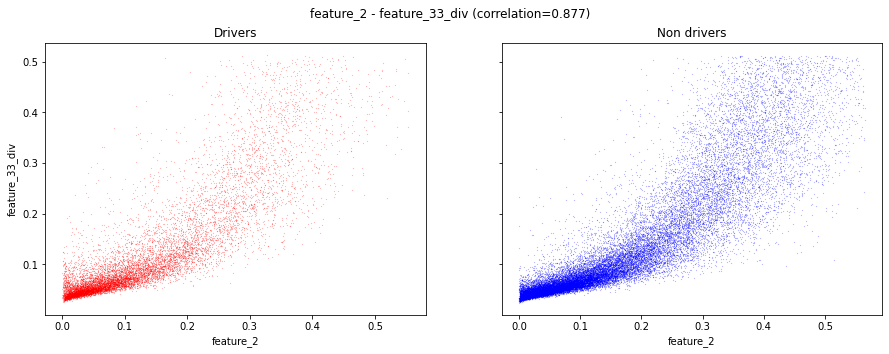

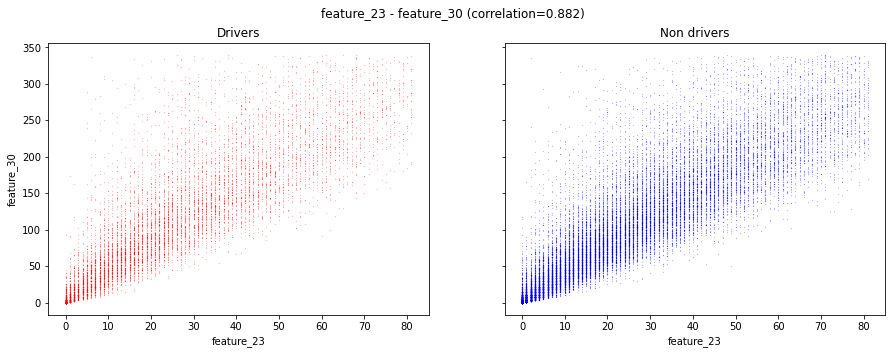

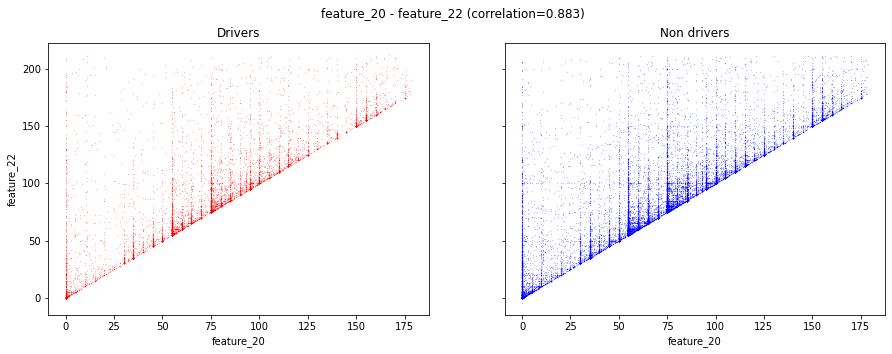

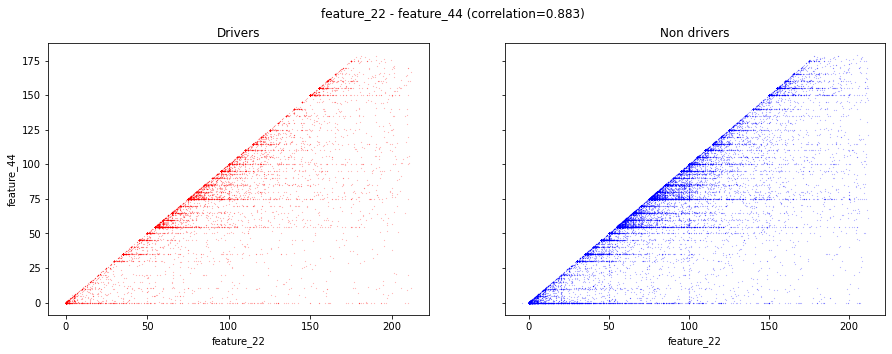

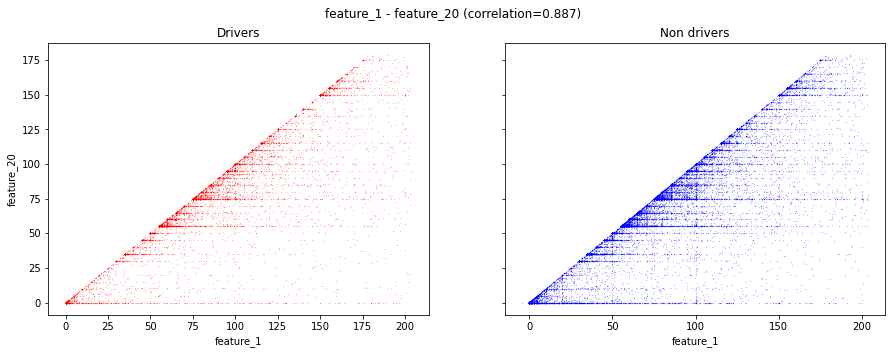

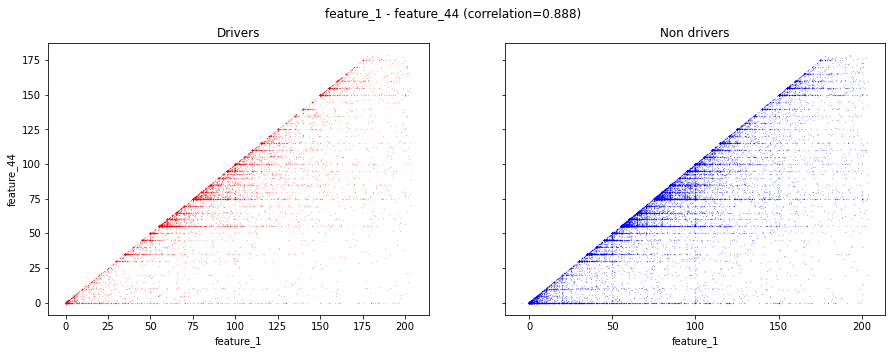

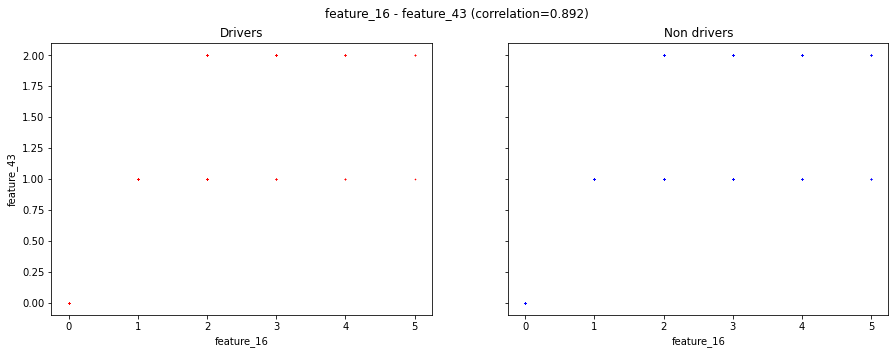

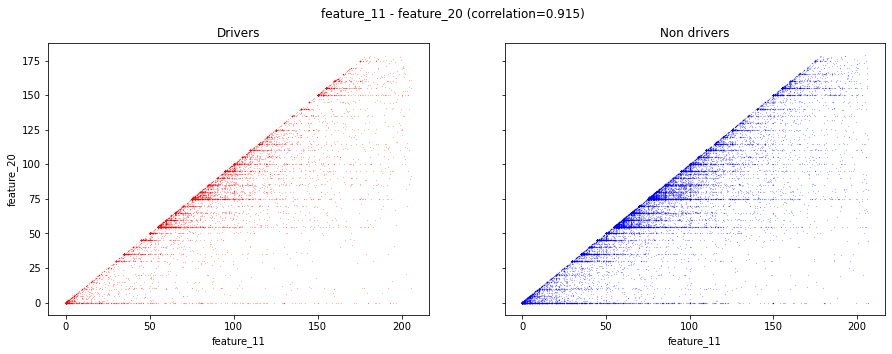

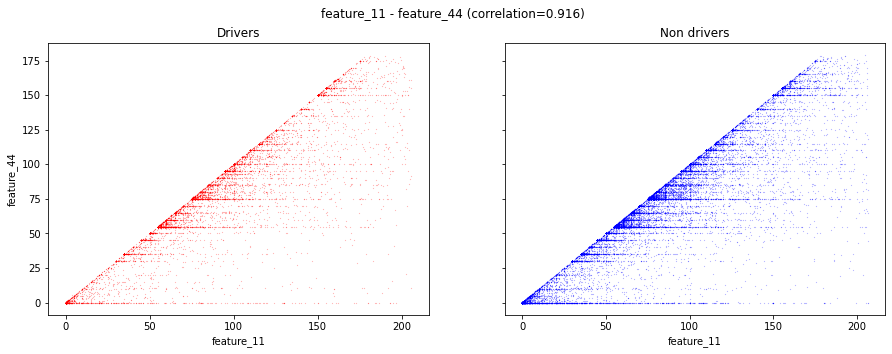

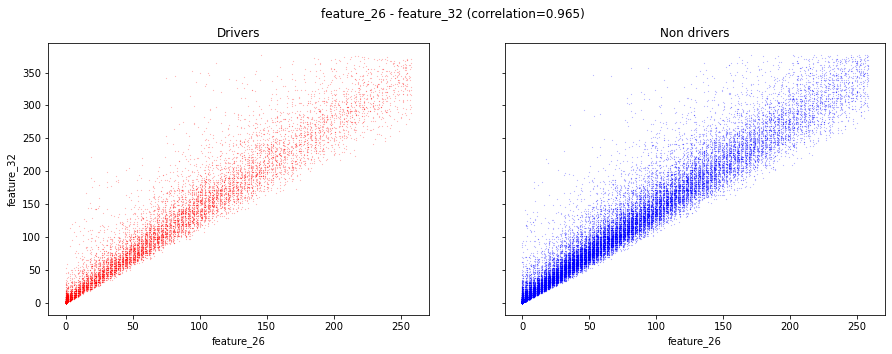

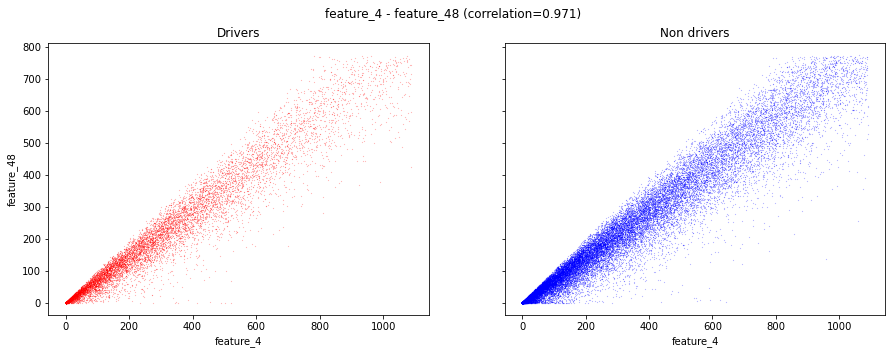

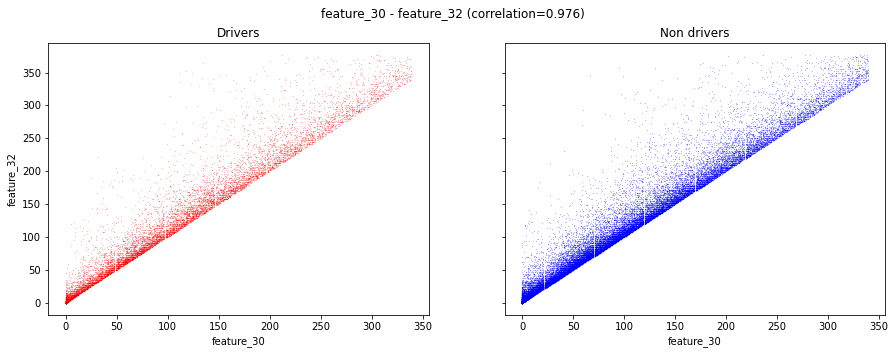

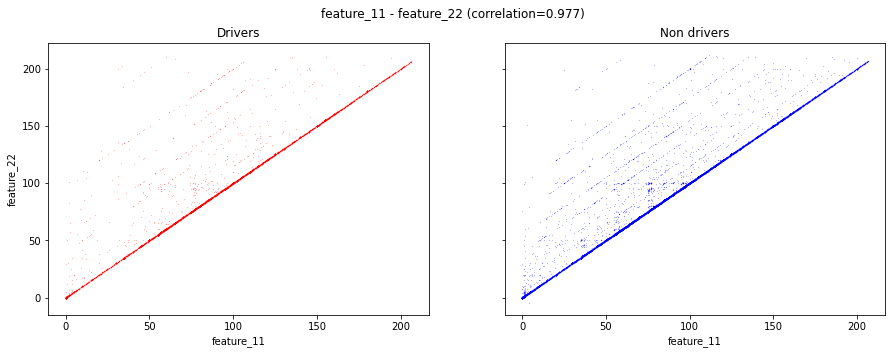

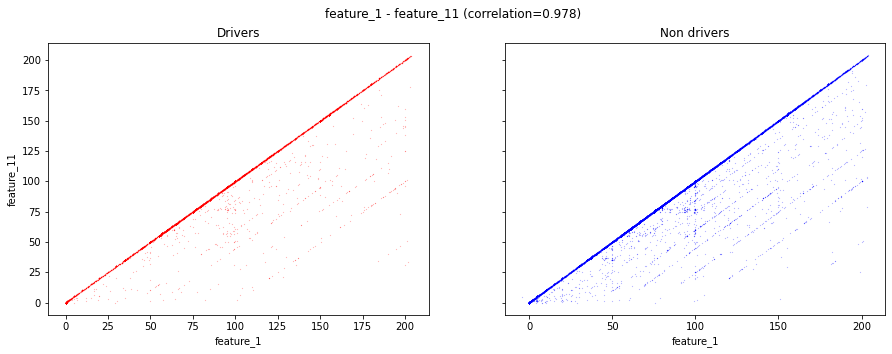

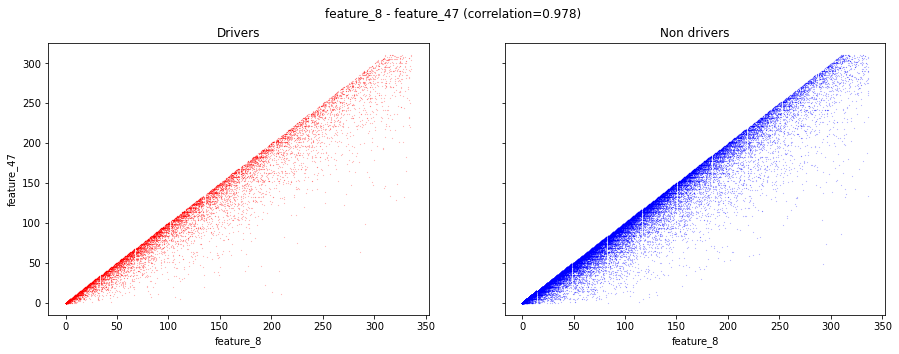

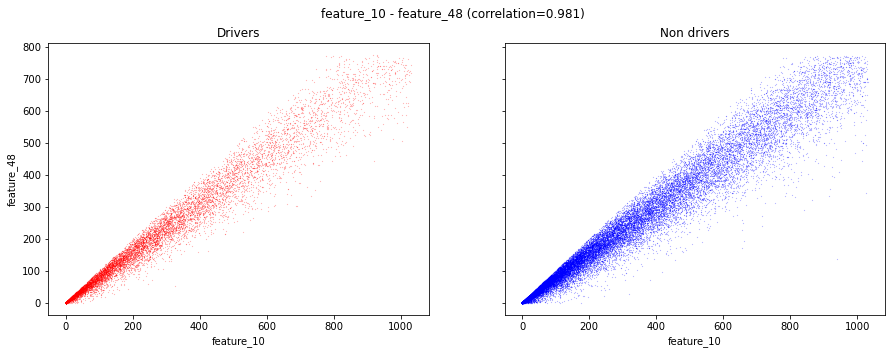

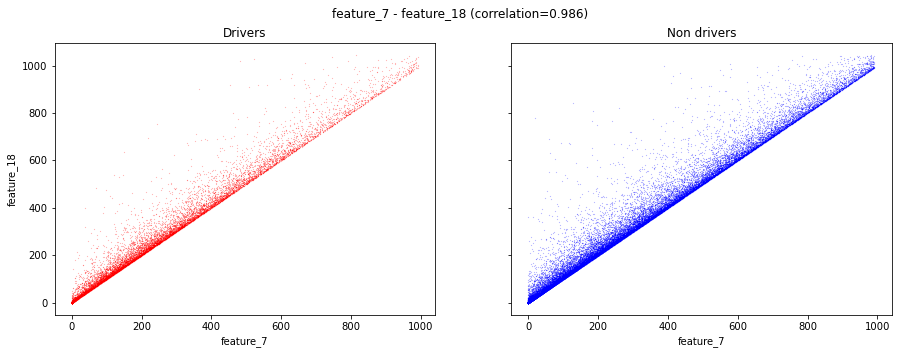

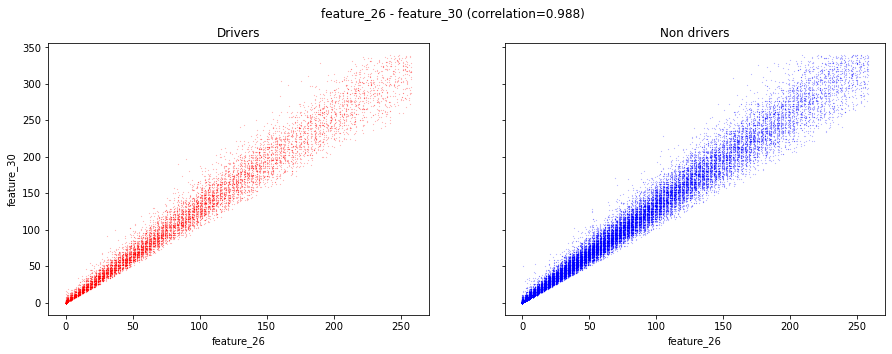

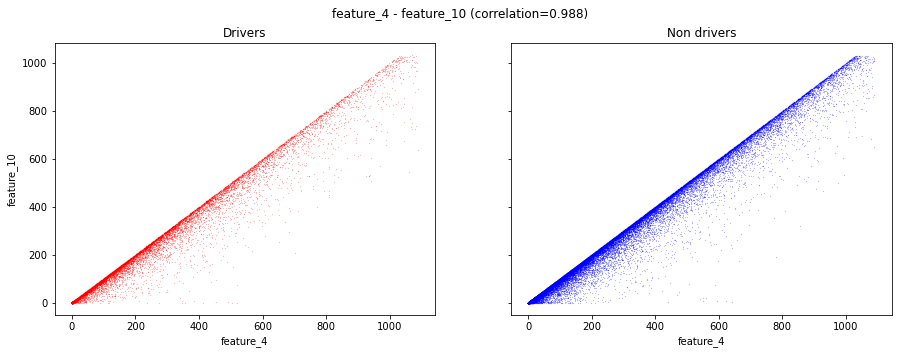

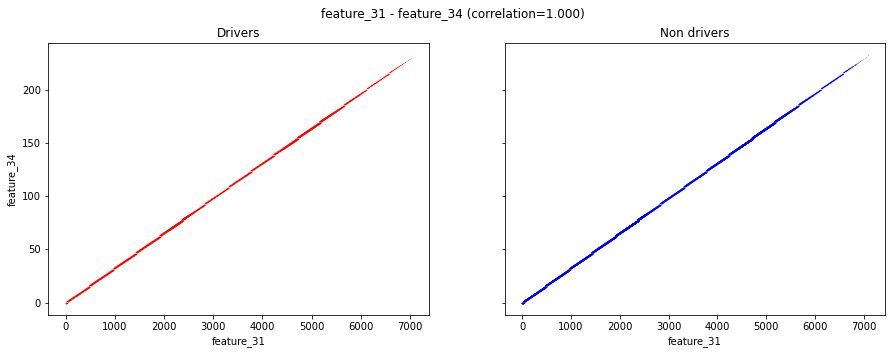

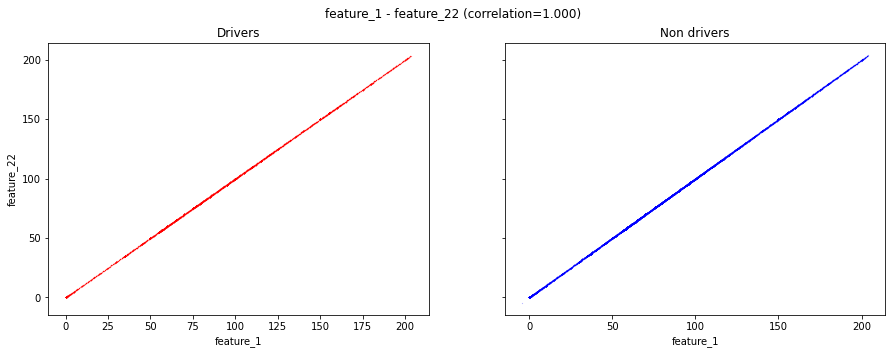

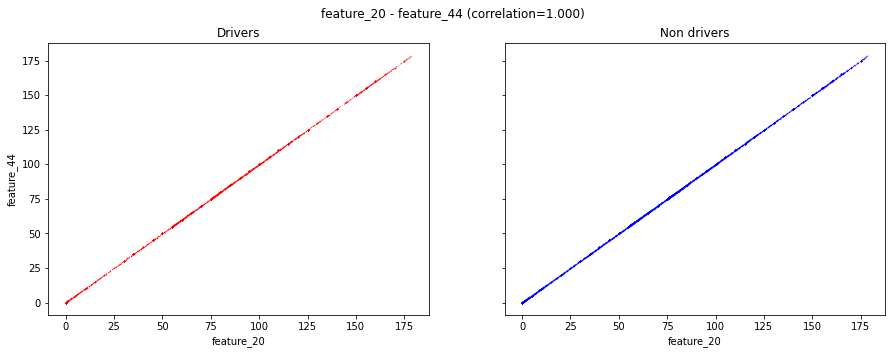

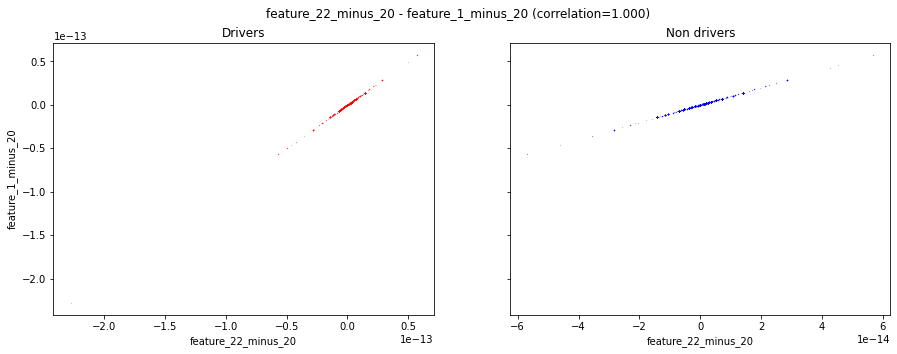

In [35]:
#most correlated features are:
#1_22(_11_20_44)
#20_44
#4_10_48(_36)
#7_18
#26_30(_32)
#31_34
#14_16(_24)
#(8_47)
#(9_49)
#(2_19_-33)

for index, pair in correlation_report.sort_values(by='correlation').iterrows():

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle("{p.column_a} - {p.column_b} (correlation={p.correlation:.3f})".format(p=pair))

#     plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
    
    data_to_combine[data_to_combine.target == 1].plot.scatter(ax=axes[0], x=pair.column_a, y=pair.column_b, s=0.01, c='red')
    axes[0].set_title('Drivers')

    data_to_combine[data_to_combine.target == 0].plot.scatter(ax=axes[1], x=pair.column_a, y=pair.column_b, s=0.01, c='blue')
    axes[1].set_title('Non drivers')

#     data_to_combine.plot.scatter(ax=axes[2], x=pair.column_a, y=pair.column_b, s=0.01, 
#                                  c=data_to_combine.target.apply(lambda x: 'red' if x == 1 else 'blue'))
#     axes[2].set_title('Both classes')

#     plt.legend(prop={'size': 16}, title = 'Features correlation')
#     plt.title("{} - {} (correlation={:.3f})".format(pair.column_a, pair.column_b, pair.correlation))
    plt.xlabel(pair.column_a)
    plt.ylabel(pair.column_b)
    plt.show()

In [36]:
#procedure combine two features with imputation of skipped values
#shrinks result to mean and standard deviation of feature1
# df - input/output dataframe
# feature1, feature2 - string name of features to combine
# combined_feature_name - string name of new combined column
# feature1_weight - weight of feature1
# correlation_sign - -1 if feature2 has opposite sign; 1 otherwise
def combine_na(df, feature1, feature2, combined_feature_name, feature1_weight=0.5, correlation_sign=1):
    #calculate means and standard deviation for both non-null values
    df_f1_f2 = df[{feature1, feature2}].dropna()
    f1_mean = df_f1_f2[feature1].mean()
    f1_std = df_f1_f2[feature1].std() 
    f2_mean = df_f1_f2[feature2].mean()
    f2_std = df_f1_f2[feature2].std() 
    f1_f2_ratio = correlation_sign * f1_std / f2_std

    f2_shrinked = feature2 + '_shrinked_to_' + feature1
    d_f2_shrinked = df[feature2].add(-f2_mean).mul(f1_f2_ratio).add(f1_mean)
    df[combined_feature_name] = (
        ((df[feature1] + d_f2_shrinked) / 2)
        .mask(pd.isnull, df[feature1])
        .mask(pd.isnull, d_f2_shrinked)
    )

In [37]:
delete_combined = False
features_to_combine = [
    #obviously correlated
    ('feature_1', 'feature_22', 'feature_1_22', 0.5),
    ('feature_20', 'feature_44', 'feature_20_44', 0.5),
    ('feature_31', 'feature_34', 'feature_31_34', 0.5),

    ('feature_26', 'feature_30', 'feature_26_30', 0.5),
    ('feature_26_30', 'feature_32', 'feature_26_30_32', 0.67),
    ('feature_4', 'feature_10', 'feature_4_10', 0.5),
    ('feature_4_10', 'feature_48', 'feature_4_10_48', 0.67),
    
    ('feature_4_10_48', 'feature_36', 'feature_4_10_48_36', 0.75),
    ('feature_7', 'feature_18', 'feature_7_18', 0.5),
    ('feature_14', 'feature_16', 'feature_14_16', 0.5)
]

for feature in features_to_combine: 
    combine_na(data_to_combine, feature[0], feature[1], feature[2], feature[3])
    if delete_combined:
        data_to_combine = data_to_combine.drop(columns=[feature[0], feature[1]], errors='ignore')

In [38]:
data_to_combine.columns

Index(['id', 'period', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_40', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_33_div', 'feature_10_minus_4', 'feature_22_minus_20',
       'feature_22_minus_44', 'feature_1_minus_20', 'feature_25_encoded',
       'target', 'feature_1_22', 'feature_20_44', 'feature_31_34',
       'feature_26_30', 'feature_26_30_32', 'feature_4_10', 'feature_4_10_48',
       'feature_4_10_48_36', 'feature

In [39]:
print('Before combining:')
print('Shape: ', targeted_data.shape)
print('Shape w/o NaN: ', data_to_combine.dropna(how='any').shape)
print('\nAfter combining:')
print('Shape: ', data_to_combine.shape)
print('Shape w/o NaN: ', data_to_combine.dropna(how='any').shape)

Before combining:
Shape:  (59441, 62)
Shape w/o NaN:  (4310, 62)

After combining:
Shape:  (59441, 62)
Shape w/o NaN:  (4310, 62)


### Find categorical features

In [40]:
#suppose categorical if
# object type
# numeric type and...
#   few uniques
#   significant class1 distribution between adjacent values
# it should treat NaN as another value if class1 probability for NaNs is different to mean that of (0.263) 

In [41]:
input_data = data_to_combine
# input_data = targeted_data #disable combine

input_data.columns

Index(['id', 'period', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_40', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_33_div', 'feature_10_minus_4', 'feature_22_minus_20',
       'feature_22_minus_44', 'feature_1_minus_20', 'feature_25_encoded',
       'target', 'feature_1_22', 'feature_20_44', 'feature_31_34',
       'feature_26_30', 'feature_26_30_32', 'feature_4_10', 'feature_4_10_48',
       'feature_4_10_48_36', 'feature

In [42]:
print("Candidates to categorical features")
nuniques = pd.DataFrame({'nunique':input_data.drop(columns=ids).drop(columns=['target']).nunique()})
probablyCategorical = nuniques.sort_values('nunique').head(5)
probablyCategorical

Candidates to categorical features


nunique
feature_14                3
feature_43                3
feature_24                3
feature_16                6
feature_25_encoded        8

In [43]:
# def print_categorical_report(df, feature):
#     total_count = 0
#     for i in df[feature].unique():
#         if pd.isna(i):
#             continue
#         total = df[df[feature] == i].shape[0]
#         class1 = (df[df[feature] == i].target == 1).sum()
        
#         class0 = (df[df[feature] == i].target == 0).sum()
#         print(i, ': ', total, ' target 1_0 ratio: ', class1, class0, class1/class0)
#         total_count += class1 + class0
#     class1 = (df[df[feature].isna()].target == 1).sum()
#     class0 = (df[df[feature].isna()].target == 0).sum()
#     total_count += class1 + class0
#     print('NaN: ', df[df[feature].isna()].shape[0], 
#           ' target 1_0 ratio: ', class1, class0, class1/class0 if class0 != 0 else np.nan)
# #     print(total_count)
# #     print((~df.target.isna()).sum())
# print_categorical_report(input_data, 'feature_24')

<Figure size 1120x400 with 0 Axes>

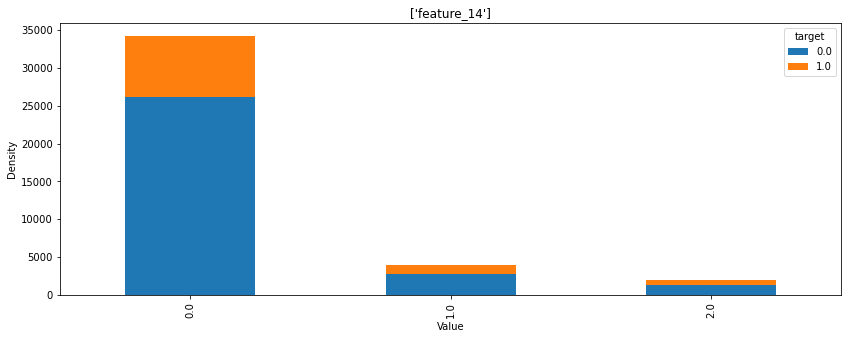

<Figure size 1120x400 with 0 Axes>

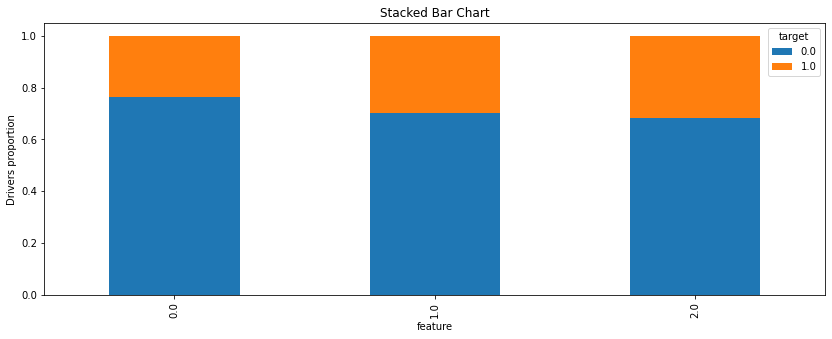

<Figure size 1120x400 with 0 Axes>

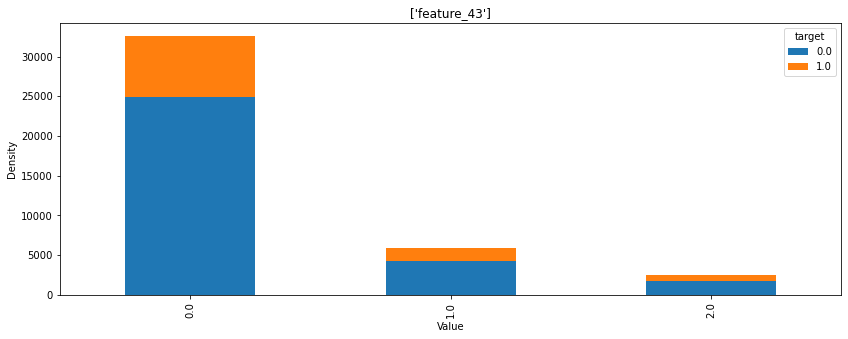

<Figure size 1120x400 with 0 Axes>

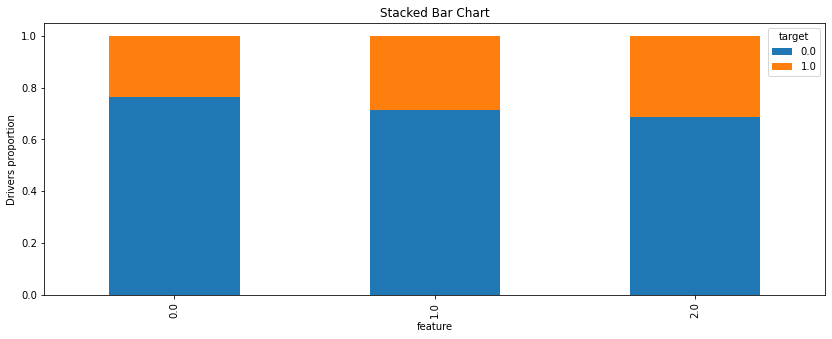

<Figure size 1120x400 with 0 Axes>

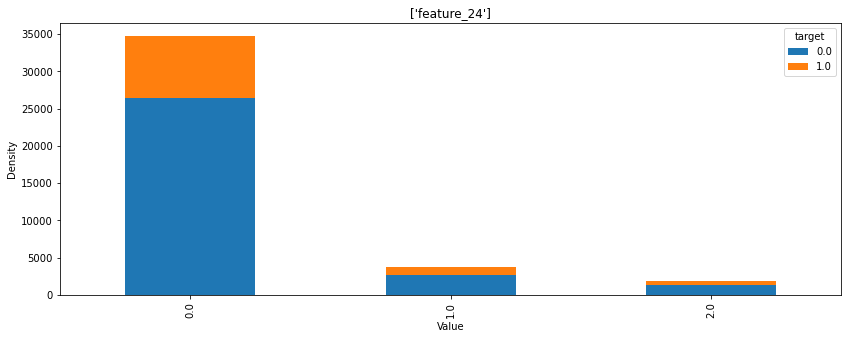

<Figure size 1120x400 with 0 Axes>

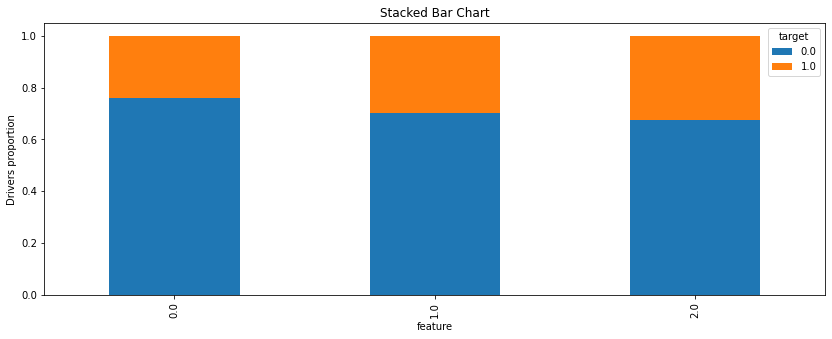

<Figure size 1120x400 with 0 Axes>

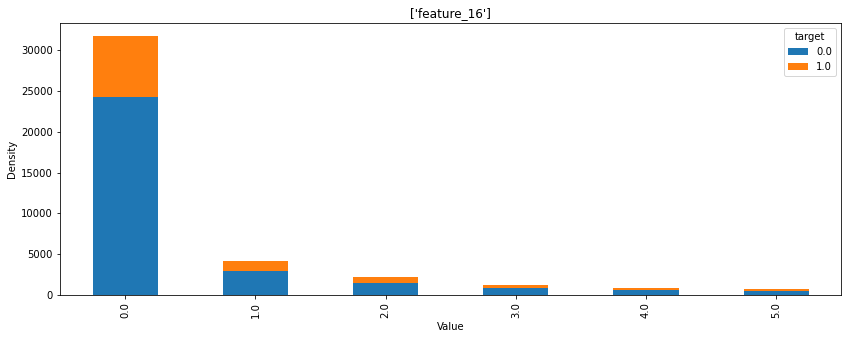

<Figure size 1120x400 with 0 Axes>

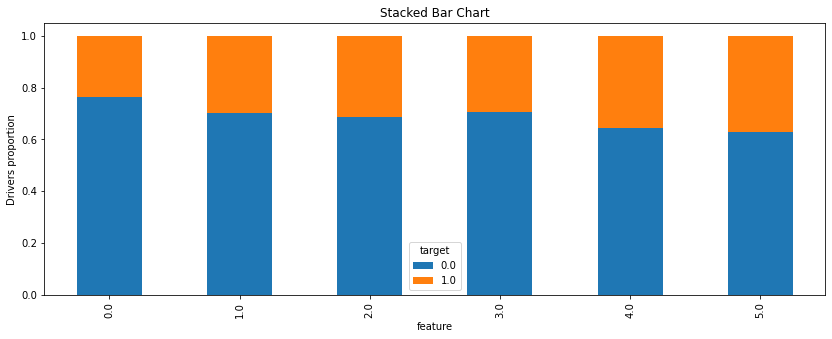

<Figure size 1120x400 with 0 Axes>

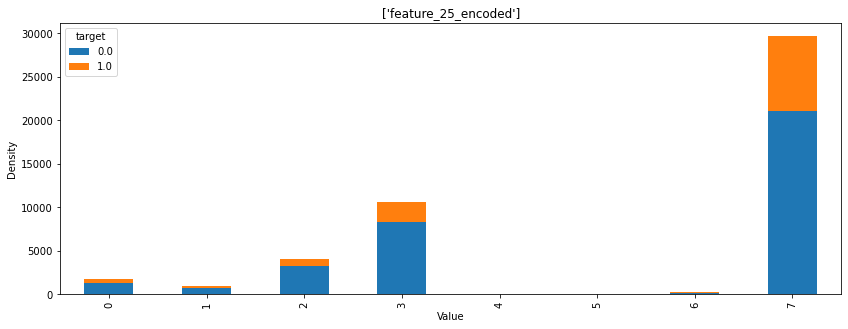

<Figure size 1120x400 with 0 Axes>

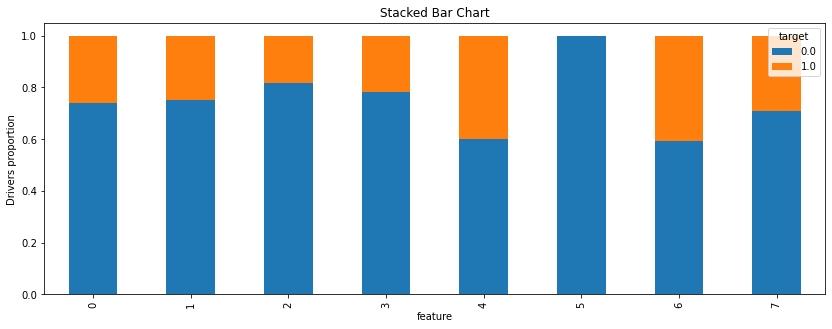

In [44]:
for feature in probablyCategorical.index:
    plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
#     fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    fig.suptitle(feature)

    table = pd.crosstab(input_data[feature],input_data.target)

#     hist_bins = input_data[feature].nunique()
#     df1 = input_data[input_data.target == 1][feature]
#     df0 = input_data[input_data.target == 0][feature]

# plt.hist(df, color = 'blue', edgecolor = 'black',
#          bins = df.nunique())

# plt.hist(df, color = 'yellow', edgecolor = 'black',
#          bins = df.nunique())

    # seaborn histogram
#     sns.distplot(df1, hist=True, kde=False, 
#                  bins=hist_bins, color = 'blue',
#                  hist_kws={'edgecolor':'black'})
#     sns.distplot(df0, hist=True, kde=False, 
#                  bins=hist_bins, color = 'yellow',
#                  hist_kws={'edgecolor':'black'})
#     sns.histplot(df1, kde=False, bins=hist_bins, color = 'blue')
#     sns.histplot(df0, kde=False, bins=hist_bins, color = 'yellow')

    table.plot(kind='bar', stacked=True, figsize=(14,5))

    # Add labels
    plt.title([feature])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    

    plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
    percent_table = table.div(table.sum(1).astype(float), axis=0)
#     sns.barplot(x=percent_table.index, y=percent_table.columns[0], data=percent_table, color = 'blue')
#     sns.barplot(x=percent_table.index, y=percent_table.columns[1], data=percent_table, color = 'yellow')
    percent_table.plot(kind='bar', stacked=True, figsize=(14,5))
    plt.title('Stacked Bar Chart')
    plt.xlabel('feature')
    plt.ylabel('Drivers proportion')

    plt.show()

#### Define categorical and noncategorical features

In [45]:
categoricalFeatures = {'feature_25_encoded'}

In [46]:
nonCategoricalFeatures = set(
    input_data.columns.array
) - categoricalFeatures
nonCategoricalFeatures

{'feature_1',
 'feature_10',
 'feature_10_minus_4',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_14_16',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_1_22',
 'feature_1_minus_20',
 'feature_2',
 'feature_20',
 'feature_20_44',
 'feature_21',
 'feature_22',
 'feature_22_minus_20',
 'feature_22_minus_44',
 'feature_23',
 'feature_24',
 'feature_26',
 'feature_26_30',
 'feature_26_30_32',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_3',
 'feature_30',
 'feature_31',
 'feature_31_34',
 'feature_32',
 'feature_33',
 'feature_33_div',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_4',
 'feature_40',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_4_10',
 'feature_4_10_48',
 'feature_4_10_48_36',
 'feature_6',
 'feature_7',
 'feature_7_18',
 'feature_8',
 'feature_9',
 'id',
 'period',
 'target'}

## Fill empty values

In [47]:
selected_input_data = input_data[nonCategoricalFeatures]
print('Count of non-NaNs rows before filling: ', selected_input_data.shape[0] - selected_input_data.dropna().shape[0])
filled_data = selected_input_data.interpolate(method='linear').fillna(0)
print('Count of non-NaNs rows after filling: ', filled_data.shape[0] - filled_data.dropna().shape[0])
filled_data['target'] = input_data.target
filled_data

Count of non-NaNs rows before filling:  55131
Count of non-NaNs rows after filling:  0


feature_42  feature_17  feature_30  feature_18  feature_32  \
0        0.000000    0.476549        93.0      333.60        93.0   
1        0.000000    0.210951       114.0      428.78       114.0   
2        0.000000    0.058675       135.0      526.38       136.0   
3        0.000000    0.966854       102.0      398.98       102.0   
4       20.014485    0.700180        82.0      215.17        95.0   
...           ...         ...         ...         ...         ...   
59436    0.000000    0.128621        59.0      227.88        60.0   
59437    0.000000    0.086625        56.0      361.98        57.0   
59438    0.000000    0.665468        35.0      282.57        38.0   
59439    0.000000    0.586869        33.0      243.13        33.0   
59440    0.000000    0.745398        20.0      351.67        20.0   

       feature_26_30_32  feature_33_div  feature_11  feature_27  feature_10  \
0             65.400927        0.496489        55.0         0.0      176.78   
1             80.773909        0.420277       110.0         0.0      315.42   
2             96.496964        0.388576        55.0         0.0      354.48   
3             71.989348        0.262502        55.0         0.0      229.98   
4             61.899376        0.073205        55.0         0.0      306.17   
...                 ...             ...         ...         ...         ...   
59436         41.814843        0.482800        77.0         0.0       94.93   
59437         38.691661        0.482800        77.0         0.0       60.12   
59438         24.779541        0.482800       106.5         0.0       79.78   
59439         21.897198        0.482800        45.0         0.0       98.40   
59440         12.363413        0.482800        35.0         0.0       30.70   

       ...  feature_26_30  feature_4_10_48_36  feature_19  feature_46  \
0      ...      70.160421          199.677038    0.277617    0.526552   
1      ...      86.203272          353.315640    0.290904    0.481063   
2      ...     102.246123          439.189679    0.284842    0.509598   
3      ...      77.035928          236.117332    0.285235    0.680089   
4      ...      61.757022          456.495715    0.161147    0.776175   
...    ...            ...                 ...         ...         ...   
59436  ...      46.093140           96.023155    0.341981    0.082128   
59437  ...      41.947222           77.143610    0.341363    0.077594   
59438  ...      27.425797           78.353342    0.000000    0.109053   
59439  ...      25.161852          201.198424    0.000000    0.101929   
59440  ...      15.196207           41.763694    0.000000    0.101929   

       feature_12  period  feature_2  feature_16  target  feature_45  
0        0.248711       1   0.432017         0.0     0.0         2.0  
1        0.261744       2   0.397517         0.0     0.0         1.0  
2        0.302164       3   0.359440         0.0     0.0         1.0  
3        0.347660       4   0.285707         0.0     0.0         0.0  
4        0.438425       5   0.101487         0.0     0.0         0.0  
...           ...     ...        ...         ...     ...         ...  
59436    0.094811       8   0.101403         0.0     NaN         0.0  
59437    0.099966       9   0.101403         0.0     NaN         0.0  
59438    0.099966      10   0.101403         0.0     NaN         1.0  
59439    0.099966      11   0.101403         0.0     NaN         0.0  
59440    0.099966      12   0.101403         0.0     NaN         0.0  

[59441 rows x 61 columns]

In [48]:
#input_data[nonCategoricalFeatures].fillna(0)

## Visualize target distribution

In [49]:
features = input_data.columns.drop(ids).drop(['target'])
# features = ['period']
features

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_40',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_33_div',
       'feature_10_minus_4', 'feature_22_minus_20', 'feature_22_minus_44',
       'feature_1_minus_20', 'feature_25_encoded', 'feature_1_22',
       'feature_20_44', 'feature_31_34', 'feature_26_30', 'feature_26_30_32',
       'feature_4_10', 'feature_4_10_48', 'feature_4_10_48_36', 'feature_7_18',
       'feature_14_16'],


/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


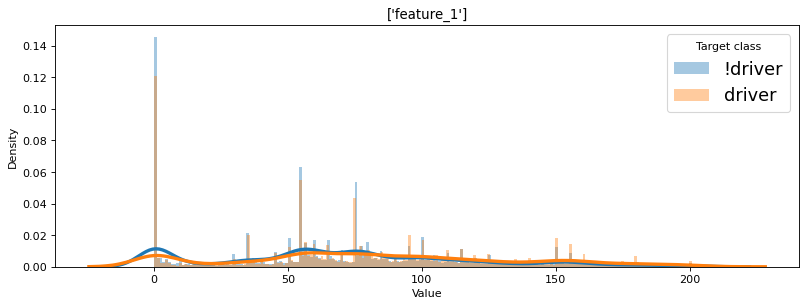

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


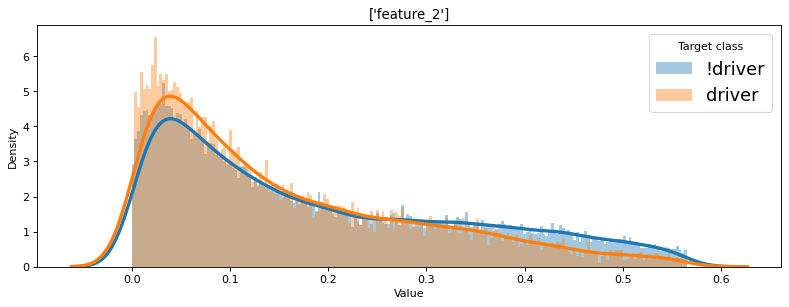

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


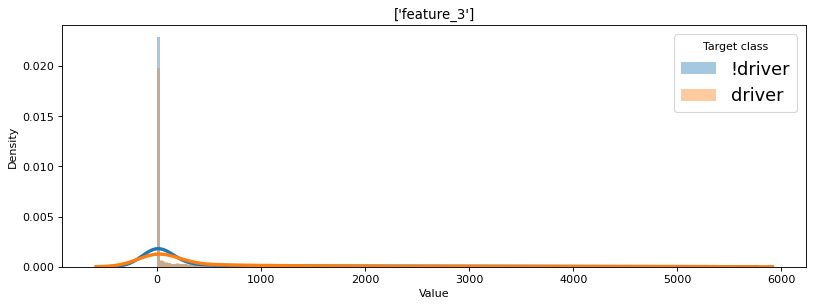

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


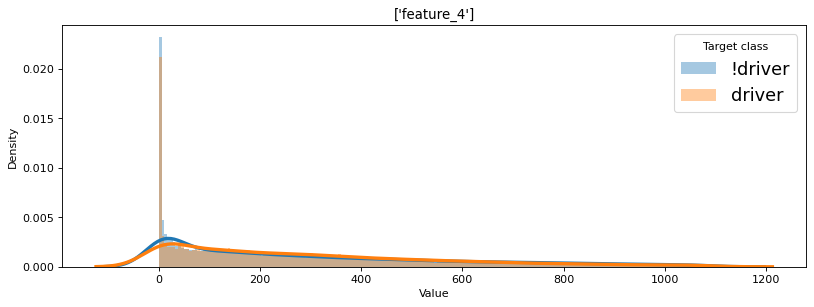

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


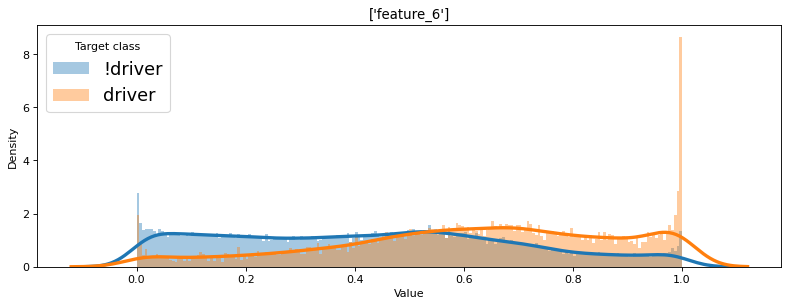

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


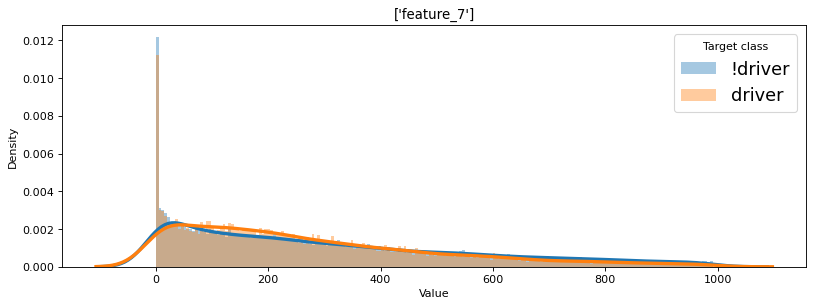

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


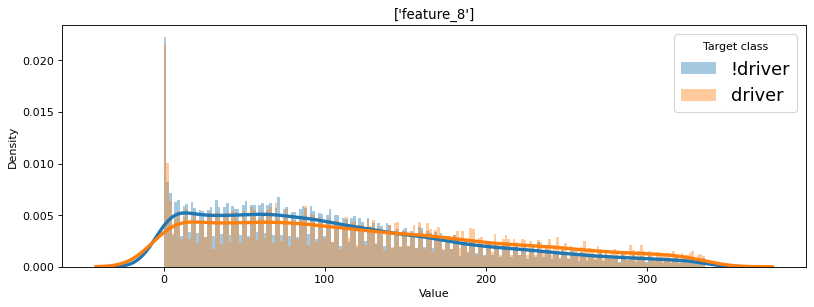

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


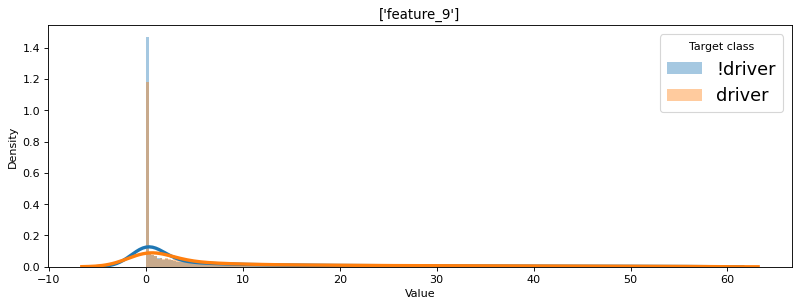

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


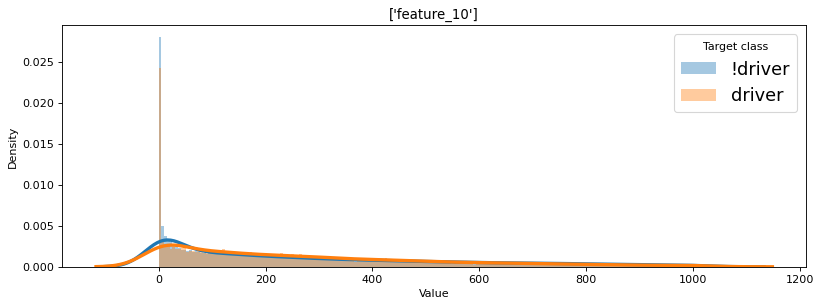

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


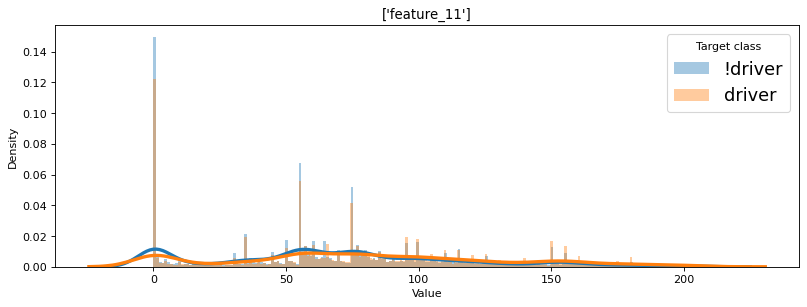

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


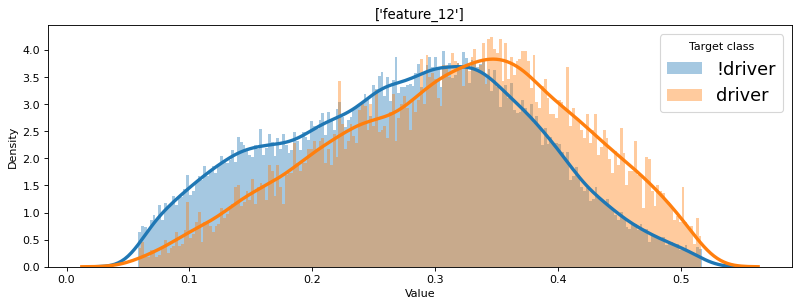

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


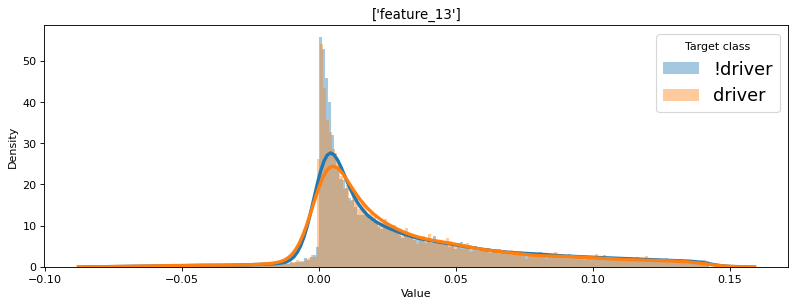

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


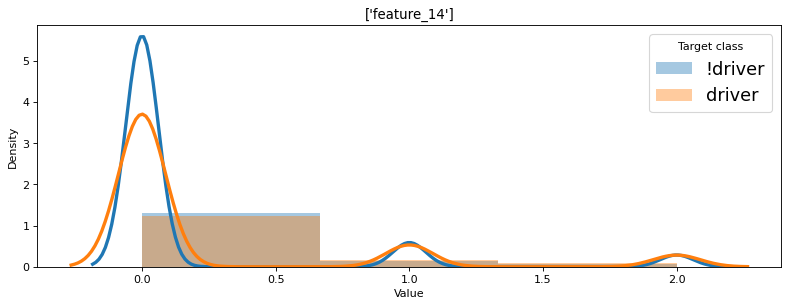

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


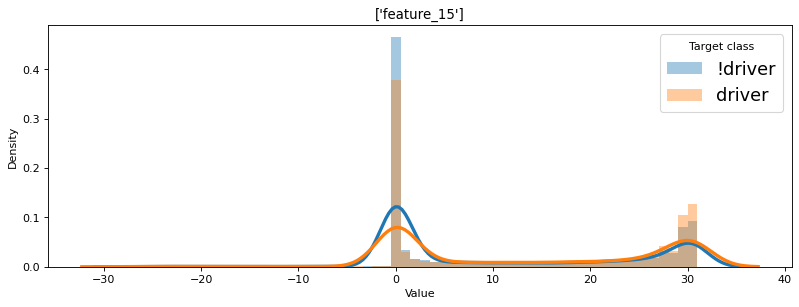

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


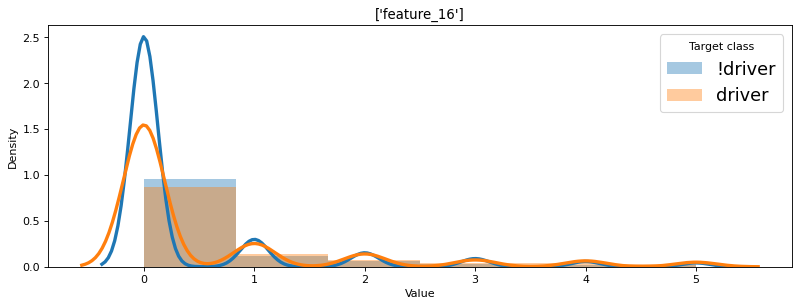

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


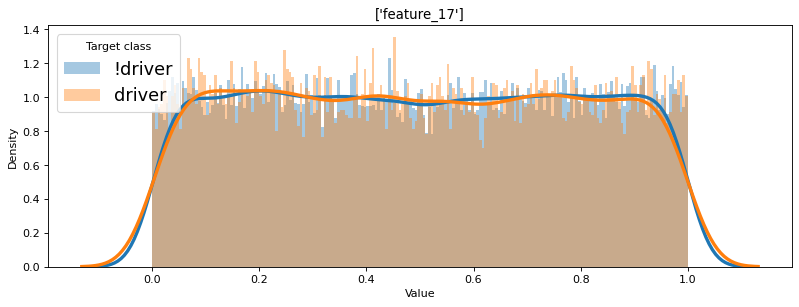

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


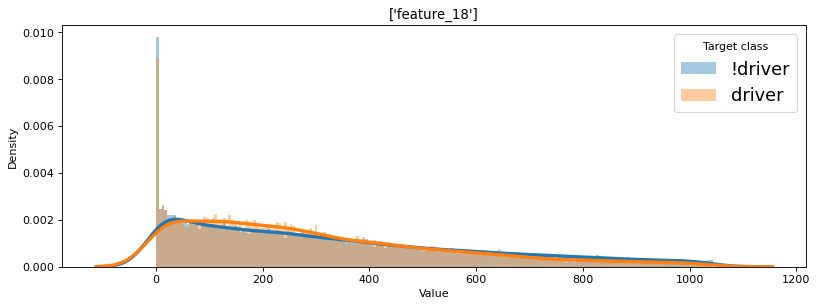

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


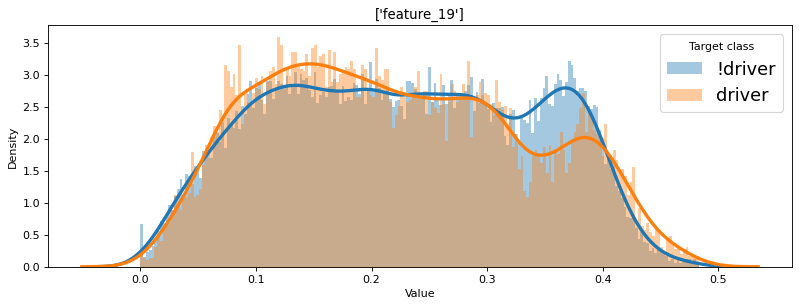

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


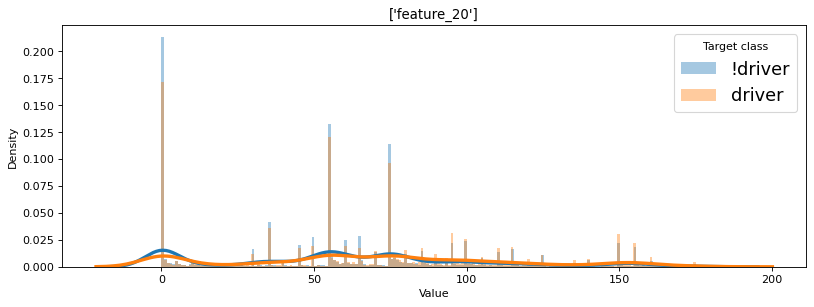

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


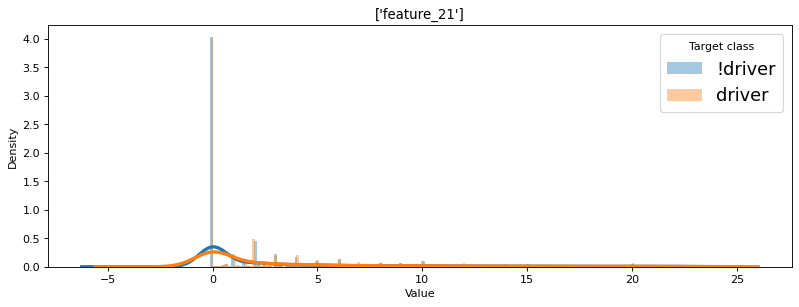

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


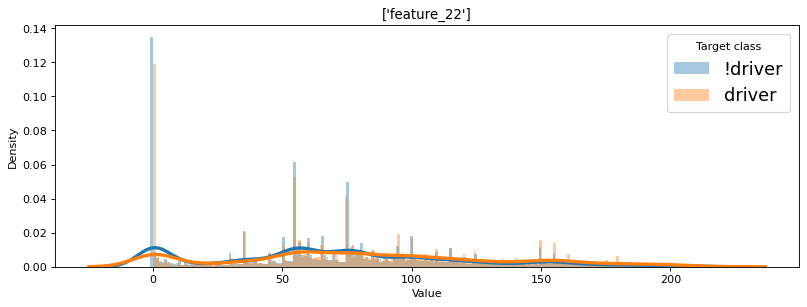

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


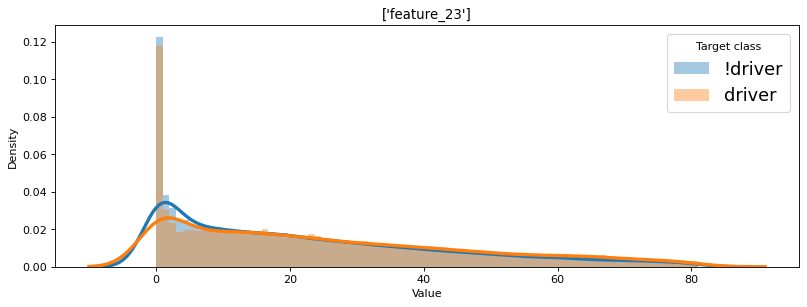

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


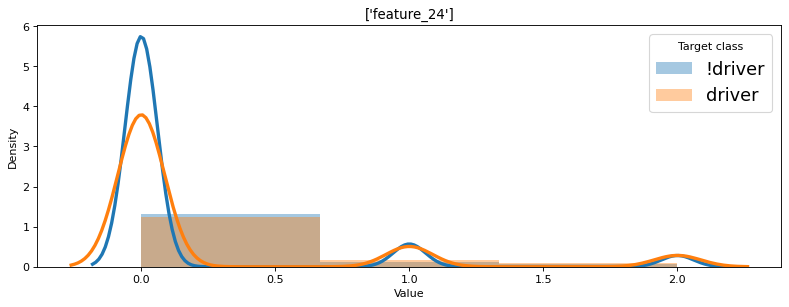

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


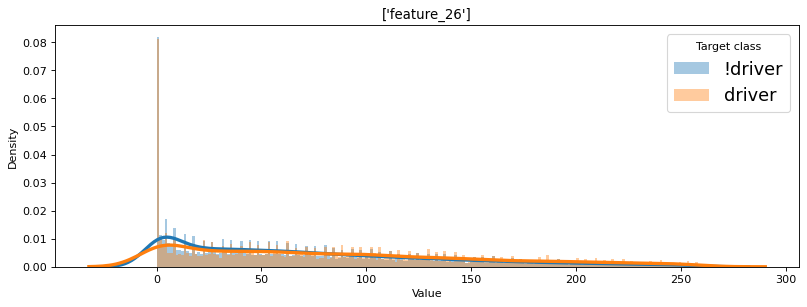

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


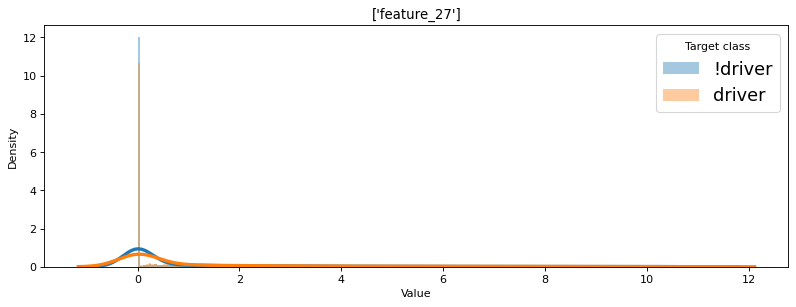

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


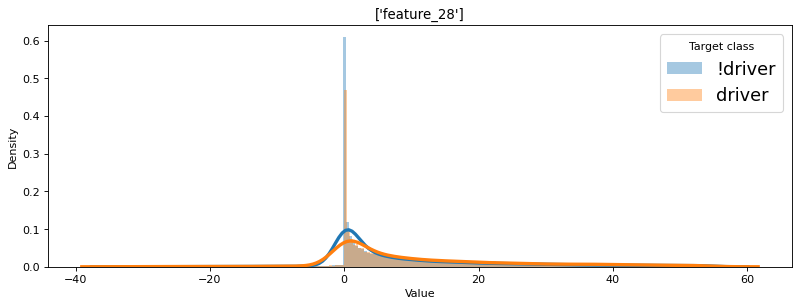

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


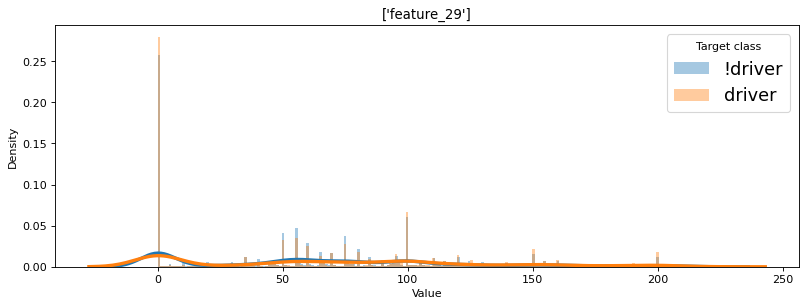

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


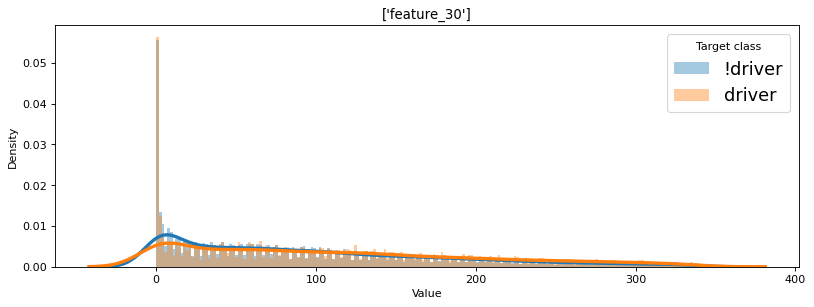

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


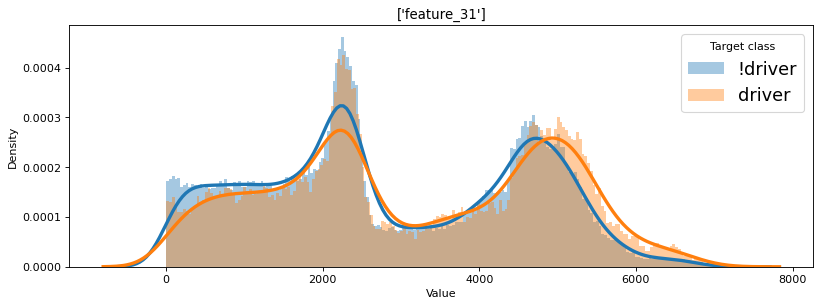

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


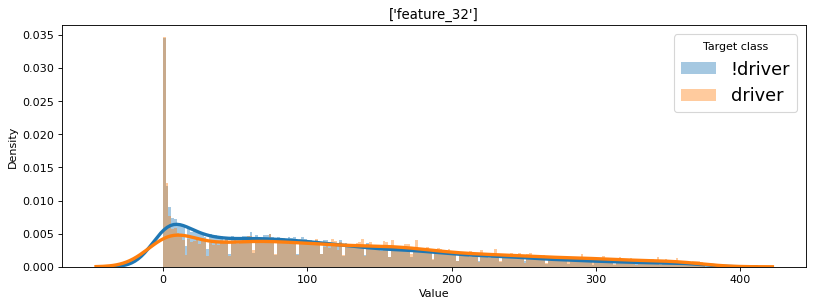

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


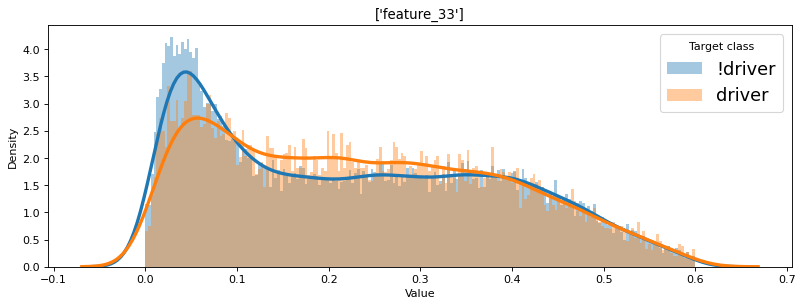

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


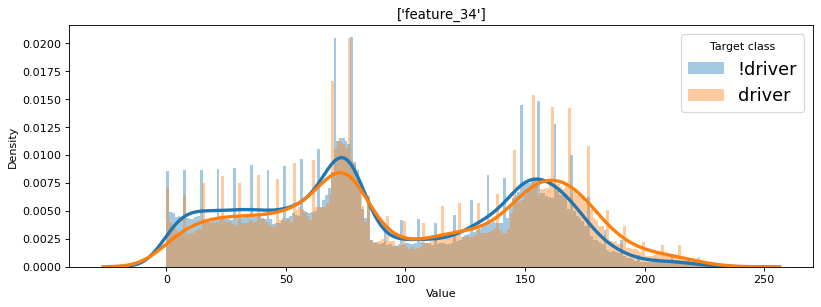

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


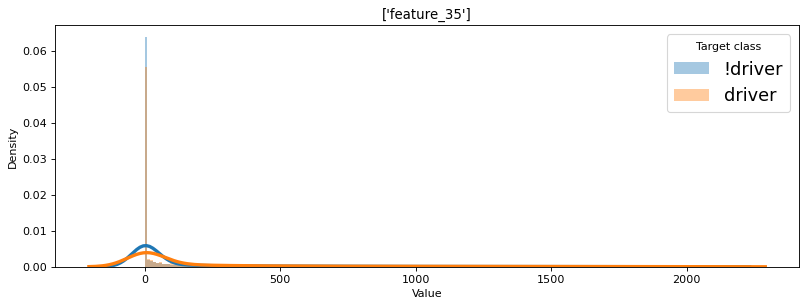

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


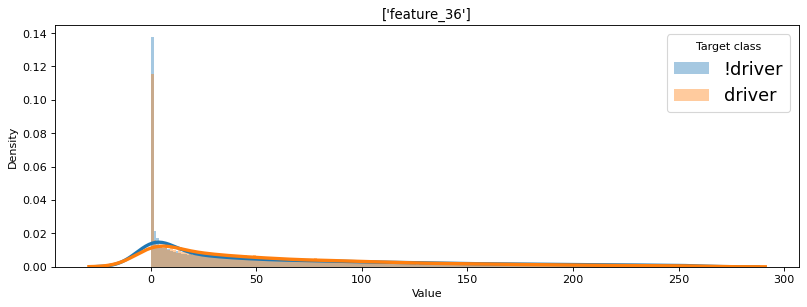

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


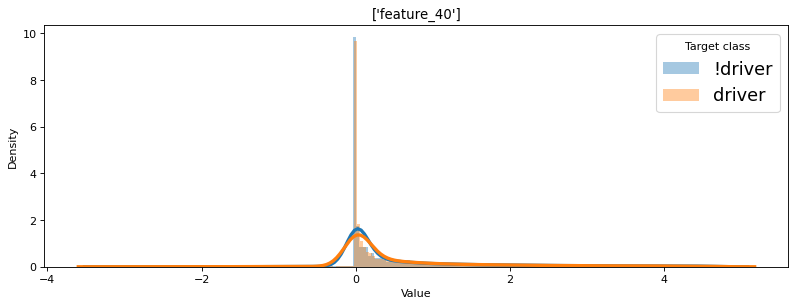

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


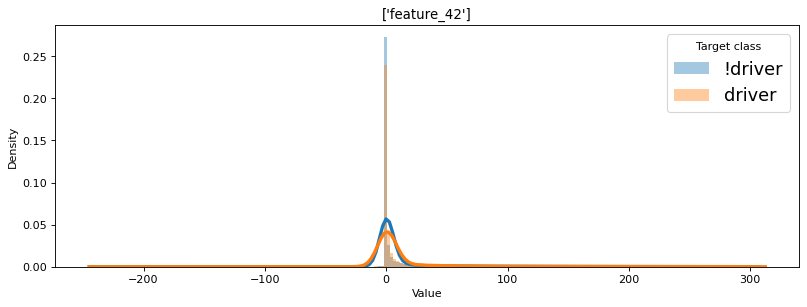

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


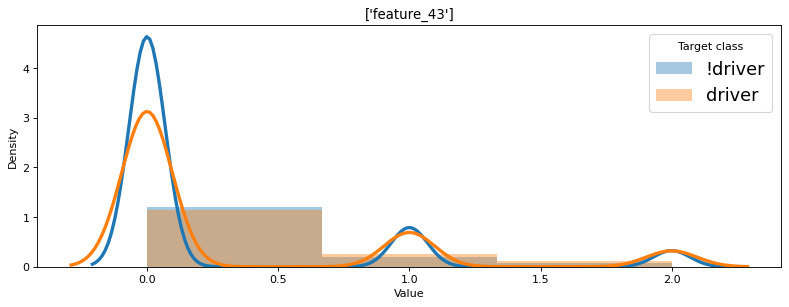

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


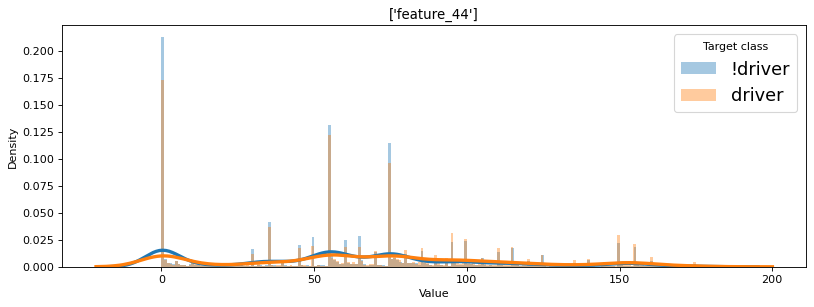

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


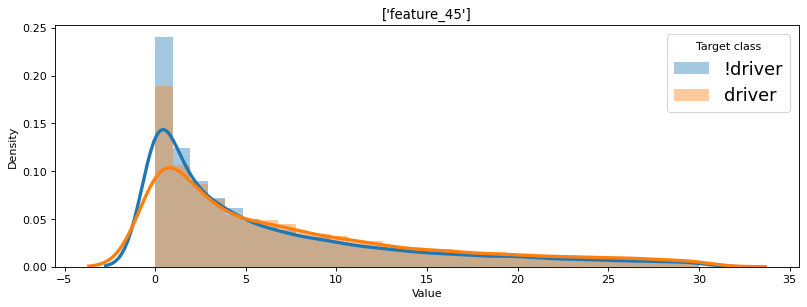

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


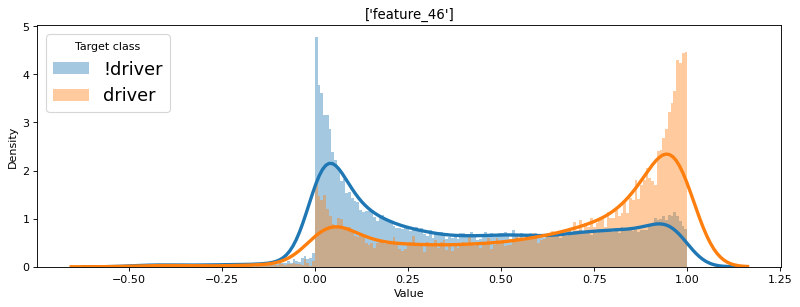

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


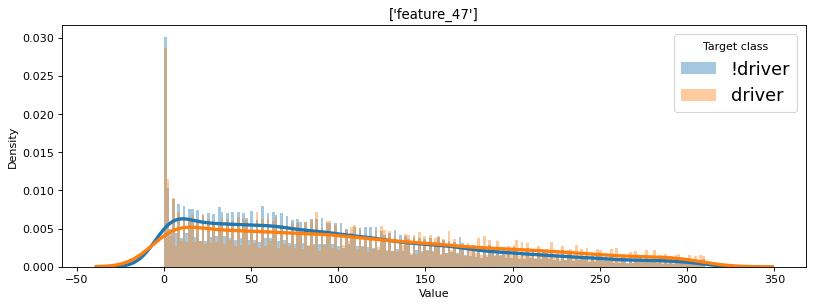

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


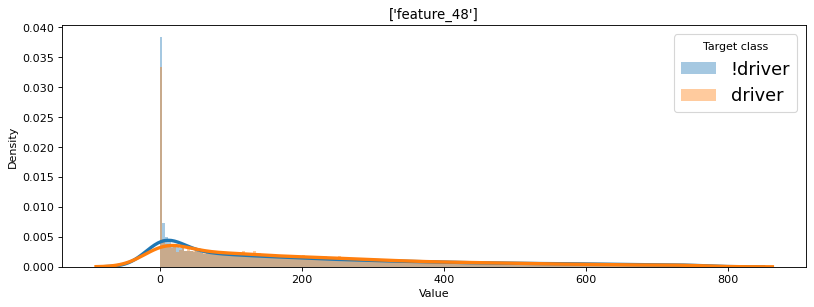

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


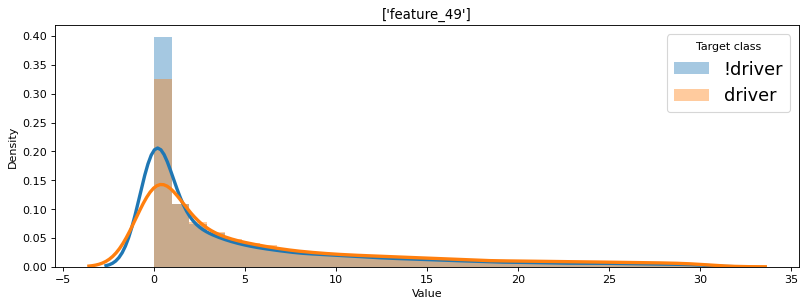

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


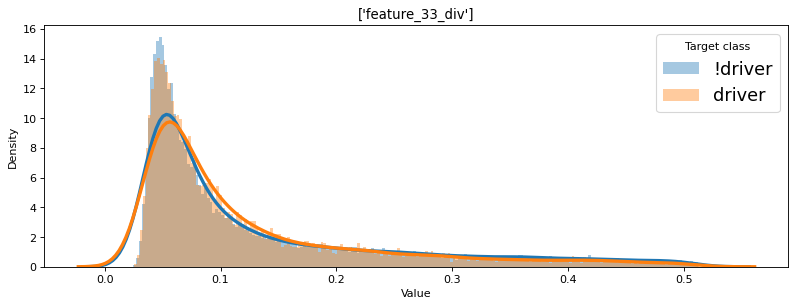

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


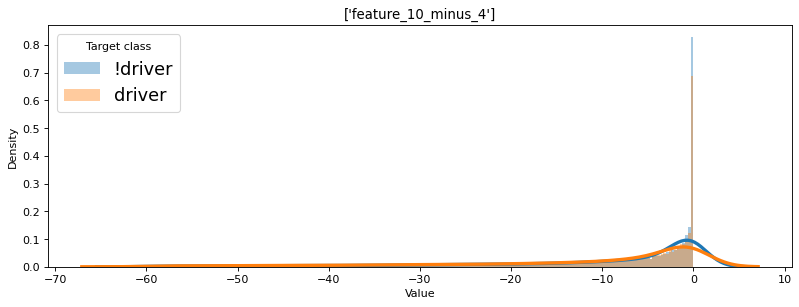

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset h

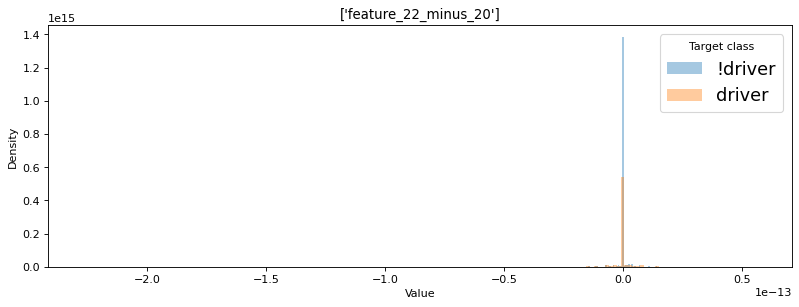

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset h

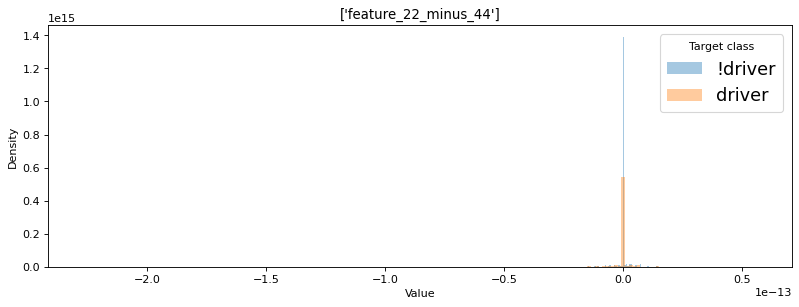

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset h

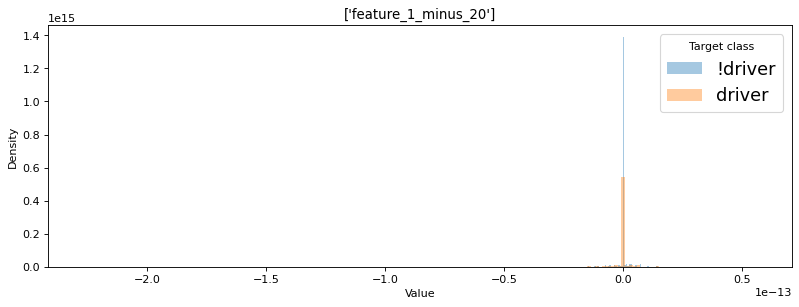

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


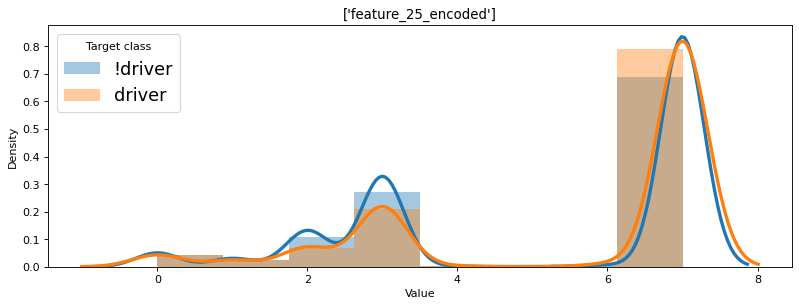

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


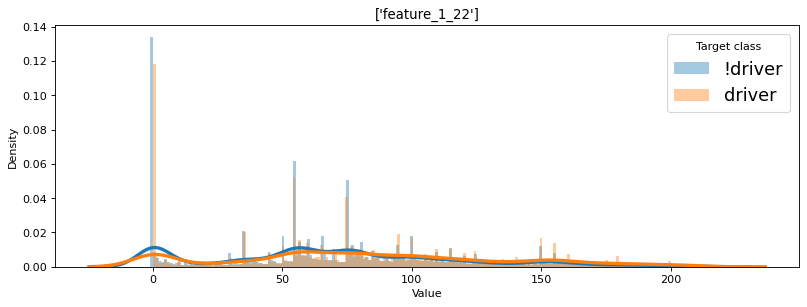

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


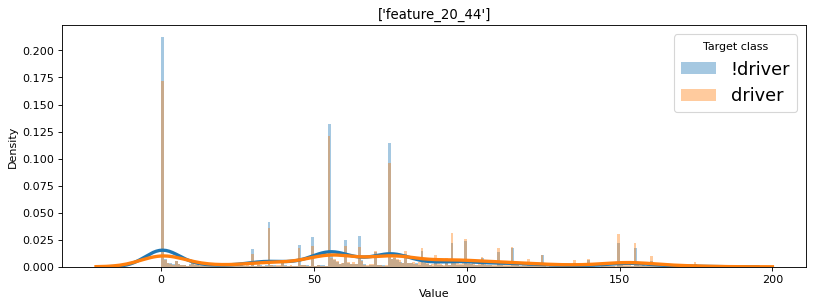

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


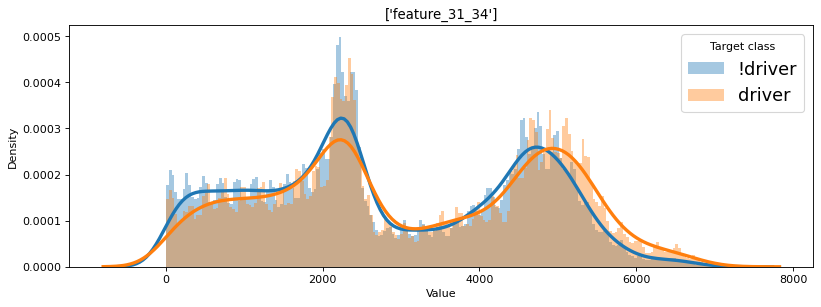

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


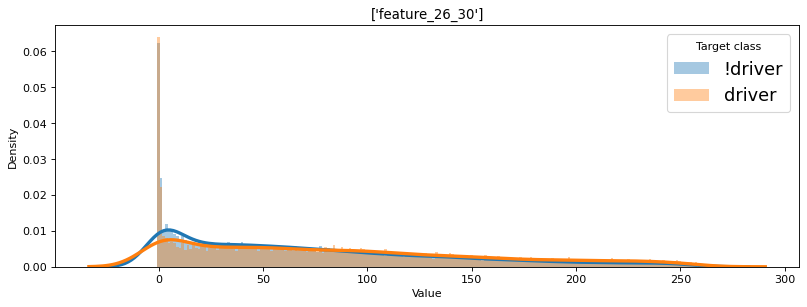

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


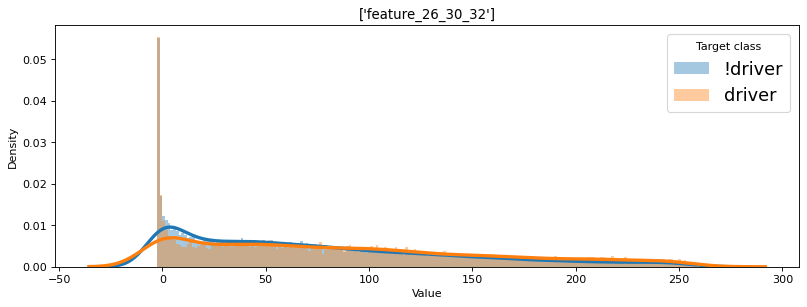

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


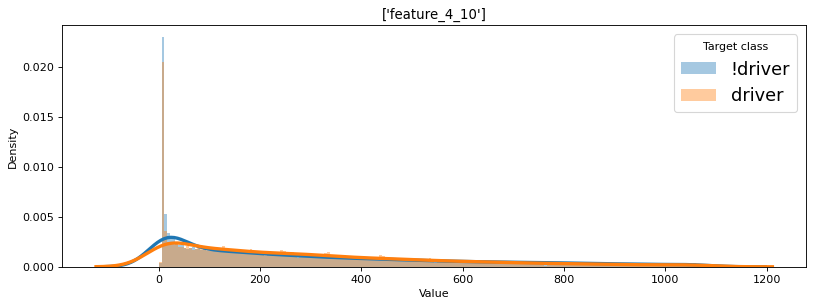

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


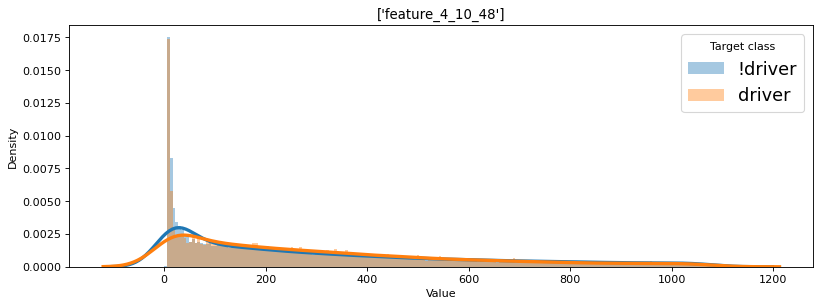

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


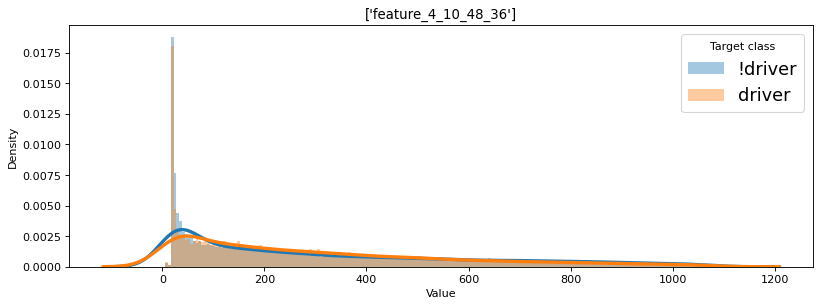

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


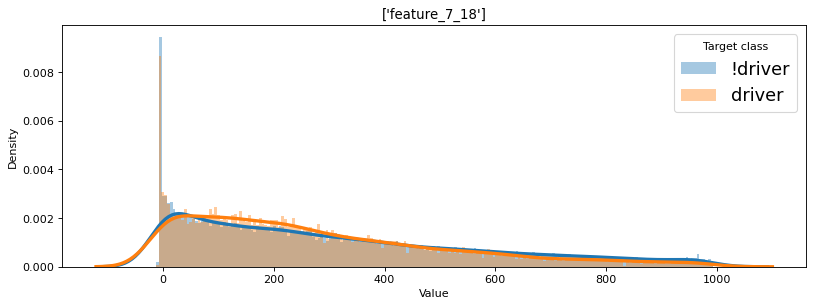

/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ihor/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


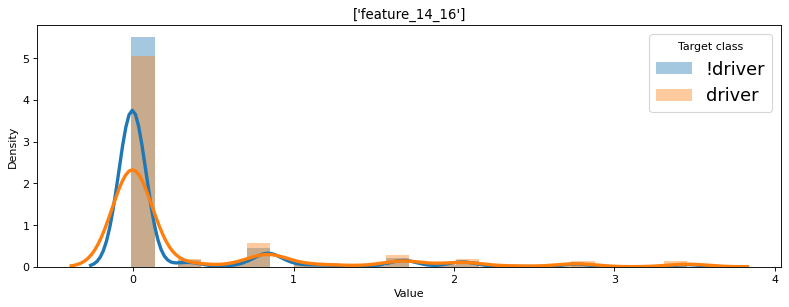

In [50]:
def classDistPlot(input_data, feature):
    plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
#     ax = plt.subplot(4, 1, i + 1)
    bins_count = min(input_data[feature].nunique(), 200)
    
    sns.distplot(input_data[input_data.target == 0][feature], hist = True, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = '!driver',
                     bins = bins_count)

    sns.distplot(input_data[input_data.target == 1][feature], hist = True, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = 'driver',
                     bins = bins_count)

    plt.legend(prop={'size': 16}, title = 'Target class')
    plt.title([feature])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()    

for feature in features:
    classDistPlot(input_data, feature)


### First exploration

In [51]:
#feature_46 has more skipped values to others
features_to_explore = {'feature_6', 'feature_12', 'feature_46', 'feature_33', 'feature_45', 'feature_15', 'feature_19', 'feature_2'}
# df = input_data[features_to_explore].isna().agg(sum, axis=1)
# df[df == 0]

In [52]:
x_label = 'feature_6'
y_label = 'feature_46'

#prepare downsampled data
# data_to_plot = input_data[input_data.target == 1][{x_label, y_label, 'target'}]
#     .append(input_data[input_data.target == 0][{x_label, y_label, 'target'}])

data_to_plot = input_data[{x_label, y_label, 'target'}].dropna()
print

ratio = (data_to_plot[data_to_plot.target == 1].count()) / (data_to_plot[data_to_plot.target == 0].count())

print(data_to_plot[data_to_plot.target == 1].count())

from sklearn.model_selection import train_test_split
data_to_plot2 = data_to_plot[data_to_plot.target == 1].append(train_test_split(data_to_plot[data_to_plot.target == 0], test_size=ratio[0])[1])
data_to_plot3 = train_test_split(data_to_plot[data_to_plot.target == 0], test_size=ratio[0])[1].append(data_to_plot[data_to_plot.target == 1])

feature_6     10224
target        10224
feature_46    10224
dtype: int64


<AxesSubplot:xlabel='feature_6', ylabel='feature_46'>

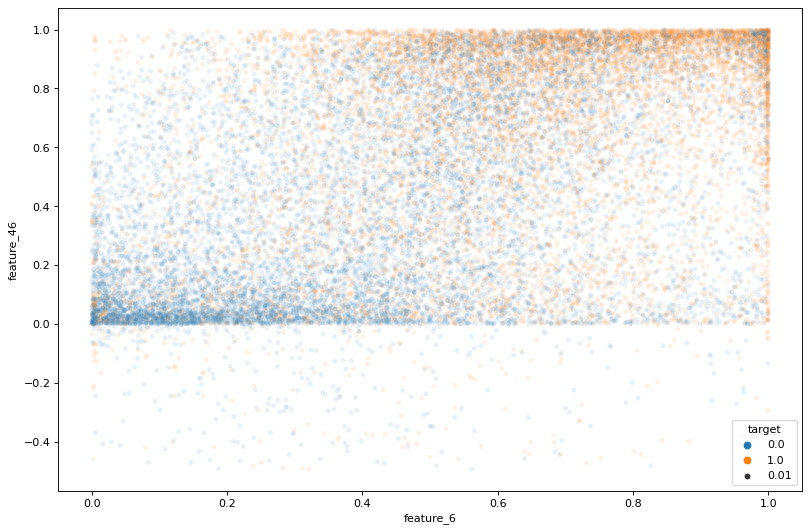

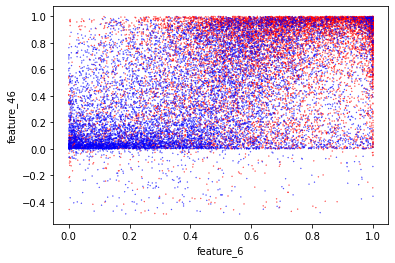

In [53]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.scatterplot(x=data_to_plot2[x_label], y=data_to_plot2[y_label], 
                hue=data_to_plot2.target,
                size=0.01, alpha=0.1)
# plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# sns.scatterplot(x=data_to_plot2[data_to_plot2.target==1][x_label], y=data_to_plot2[data_to_plot2.target==1][y_label], 
# #                 hue='red', 
#                 size=0.1, alpha=0.1)
# plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
# sns.scatterplot(x=data_to_plot2[data_to_plot2.target==0][x_label], y=data_to_plot2[data_to_plot2.target==0][y_label], 
# #                 hue='blue', 
#                 size=0.1, alpha=0.1)
data_to_plot2.plot.scatter(x=x_label, y=y_label, s=0.1, c=data_to_plot2.target.apply(lambda x: 'red' if x == 1 else 'blue'))
# data_to_plot2[data_to_plot2.target == 1].plot.scatter(x=x_label, y=y_label, s=1, c='red')
# data_to_plot2[data_to_plot2.target == 0].plot.scatter(x=x_label, y=y_label, s=1, c='blue')

<AxesSubplot:xlabel='feature_6', ylabel='feature_46'>

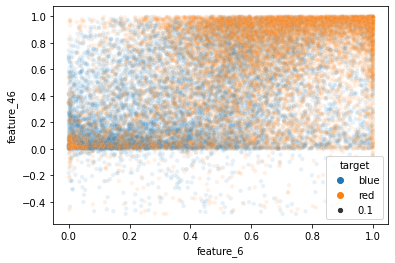

In [54]:
sns.scatterplot(x=data_to_plot3[x_label], y=data_to_plot3[y_label], 
                hue=data_to_plot3.target.apply(lambda x: 'red' if x == 1 else 'blue'), 
                size=0.1, alpha=0.1)

## Replace categorical features with dummies

In [55]:
print(categoricalFeatures)
input_cat_dummy_data = pd.DataFrame()
for catFeat in categoricalFeatures:
    input_cat_dummy_data_joined = input_cat_dummy_data.join(pd.get_dummies(input_data[catFeat], prefix=catFeat), how='right')
    input_cat_dummy_data = input_cat_dummy_data_joined
#     input_data.drop(columns=[catFeat], inplace=True)

{'feature_25_encoded'}


In [56]:
cat_dummy_names = input_cat_dummy_data.columns
print(cat_dummy_names)

Index(['feature_25_encoded_0', 'feature_25_encoded_1', 'feature_25_encoded_2',
       'feature_25_encoded_3', 'feature_25_encoded_4', 'feature_25_encoded_5',
       'feature_25_encoded_6', 'feature_25_encoded_7'],
      dtype='object')


## Logistic regression

In [57]:
features_to_explore = {
#     'feature_2',
#     'feature_6', 
#     'feature_7', 
#     'feature_8', 
#     'feature_12', 
#     'feature_13', 
#     'feature_15', 
#     'feature_19', 
#     'feature_23', 
#     'feature_30', 
#     'feature_32', 
#     'feature_33',
#     'feature_45',
#     'feature_46',
#     'feature_47',
#     'feature_48',
#     'feature_49'

#     'feature_2',
#     'feature_4_10_48_36', 
    'feature_6', 
#     'feature_7_18', 
#     'feature_8', 
#     'feature_12', 
#     'feature_13', 
#     'feature_15', 
#     'feature_19', 
#     'feature_23', 
#     'feature_26_30_32', 
#     'feature_28', 
#     'feature_31_34',
#     'feature_33', 
#     'feature_45',
    'feature_46',
#     'feature_47',
#     'feature_49'
}

cat_features_to_explore = {
#     'feature_25_encoded_0', 
#     'feature_25_encoded_1',
#     'feature_25_encoded_2', 
#     'feature_25_encoded_3', 
#     'feature_25_encoded_4',
#     'feature_25_encoded_5', 
#     'feature_25_encoded_6', 
    'feature_25_encoded_7'    
}
# features_to_explore = nonCategoricalFeatures

#### Select, oversample, normalize data

In [58]:
logit_features = features_to_explore #- {'feature_26_30_32','feature_28','feature_49'}
#- {'feature_30', 'feature_23', 'feature_49', 'feature_8', 'feature_45', 'feature_15'}
print(logit_features)

#select data by feature list and rows with one or more NaNs
# xy_selected_data = input_data[logit_features | {'id', 'target'}].dropna()
xy_selected_data = filled_data[logit_features | {'id', 'target'}].dropna()
print('Selected:\n\r', xy_selected_data.target.value_counts())      

#simple oversampling - just add copies of all the class 1 rows
xy_oversampled_data = xy_selected_data.append(xy_selected_data[xy_selected_data.target == 1])
xy_oversampled_data = xy_oversampled_data.append(xy_selected_data[xy_selected_data.target == 1])
print('\n\rOversampled:\n\r', xy_oversampled_data.target.value_counts())      
print(xy_oversampled_data.shape)

#normalize
from sklearn import preprocessing
if cat_features_to_explore == {}:
    xy_joined = xy_oversampled_data
    
    scaler = preprocessing.StandardScaler().fit(xy_joined[logit_features])
    X = pd.DataFrame(scaler.transform(xy_joined[logit_features]), 
                     columns=logit_features, index=xy_joined.index)
else:
    xy_joined = xy_oversampled_data.join(input_cat_dummy_data[cat_features_to_explore])
    # xy_joined.reset_index(inplace=True)
    print(xy_joined.shape)
    print(xy_joined.columns)

    scaler = preprocessing.StandardScaler().fit(xy_joined[logit_features | cat_features_to_explore])
    X = pd.DataFrame(scaler.transform(xy_joined[logit_features | cat_features_to_explore]), 
                     columns=logit_features | cat_features_to_explore, index=xy_joined.index)
y = xy_joined.target

#join categorical dummies
# xy_joined

{'feature_6', 'feature_46'}
Selected:
 0.0    34946
1.0    12532
Name: target, dtype: int64

Oversampled:
 1.0    37596
0.0    34946
Name: target, dtype: int64
(72542, 4)
(72542, 5)
Index(['id', 'feature_6', 'target', 'feature_46', 'feature_25_encoded_7'], dtype='object')


#### Check selected features

In [59]:
import statsmodels.api as sm

print(X.shape)
print(y.shape)

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

#it should delete features with P>|z| > 0.05 

(72542, 3)
(72542,)
Optimization terminated successfully.
         Current function value: 0.617174
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: target           AIC:              89548.0372
Date:               2021-06-07 21:26 BIC:              89575.6129
No. Observations:   72542            Log-Likelihood:   -44771.   
Df Model:           2                LL-Null:          -50234.   
Df Residuals:       72539            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
feature_25_encoded_7 0.1299   0.0082 15.8795 0.0000 0.1139 0.1459
feature_6            0.4778   0.0094 50.6892 0

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
def print_prediction_report(xy):
    from sklearn.metrics import confusion_matrix
    # confusion_matrix = confusion_matrix(y_test, y_pred)
    # [[t0, f1] 
    #  [f0, t1]]
    confusion_matrix = confusion_matrix(xy.target, xy.y_pred)
    target_value_counts = xy.target.value_counts()
    print(target_value_counts)
    print(confusion_matrix)
    # xy_predicted_data.shape
    print('Overall data to predicted class 1 ratio (selectivity): {:.2f}'. \
          format(xy.shape[0] / (confusion_matrix[1,1] + confusion_matrix[0,1])))
    print('Precision of class 1 prediction (precision): {:.2f}'.format(confusion_matrix[1,1] / (confusion_matrix[1,1] + confusion_matrix[0,1])))
    print('(initial class 1 probability is {:.2f})'.format(target_value_counts[target_value_counts.index == 1].sum() / target_value_counts.sum()))
    print('Completeness of class 1 prediction (recall): {:.2f}'.format(confusion_matrix[1,1] / (confusion_matrix[1,1] + confusion_matrix[1,0])))

    from sklearn.metrics import classification_report
    print(classification_report(xy.target, xy.y_pred))
    #показники якості бінарної кваліфікації:
    #recall - повнота (яка частина певного класу виявлена)
    #precision - точність (яка частина припущень щодо належності до класу є вірною)

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(xy.target, xy.y_pred)
    fpr, tpr, thresholds = roc_curve(xy.target, xy.y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('Log_ROC')
    plt.show()

In [62]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


1.0    11265
0.0    10498
Name: target, dtype: int64
[[6450 4048]
 [3229 8036]]
Overall data to predicted class 1 ratio (selectivity): 1.80
Precision of class 1 prediction (precision): 0.67
(initial class 1 probability is 0.52)
Completeness of class 1 prediction (recall): 0.71
              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64     10498
         1.0       0.67      0.71      0.69     11265

    accuracy                           0.67     21763
   macro avg       0.67      0.66      0.66     21763
weighted avg       0.67      0.67      0.66     21763



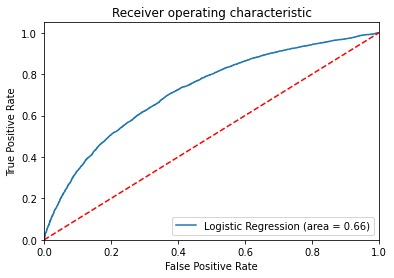

In [63]:
print_prediction_report(pd.DataFrame({'target':y_test, 'y_pred':y_pred, 'y_pred_proba':logreg.predict_proba(X_test)[:,1]}))

In [64]:
#aggregation by id
xy_predicted_data = pd.DataFrame(xy_joined[{'id', 'target'}])
xy_predicted_data['y_pred'] = logreg.predict(X)
xy_predicted_data['y_pred_proba'] = logreg.predict_proba(X)[:,1]
print(xy_predicted_data.shape)

(72542, 4)


1.0    37596
0.0    34946
Name: target, dtype: int64
[[21524 13422]
 [10869 26727]]
Overall data to predicted class 1 ratio (selectivity): 1.81
Precision of class 1 prediction (precision): 0.67
(initial class 1 probability is 0.52)
Completeness of class 1 prediction (recall): 0.71
              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64     34946
         1.0       0.67      0.71      0.69     37596

    accuracy                           0.67     72542
   macro avg       0.67      0.66      0.66     72542
weighted avg       0.67      0.67      0.66     72542



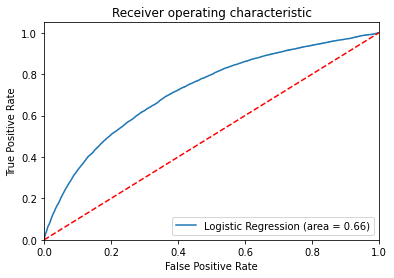

In [65]:
print_prediction_report(xy_predicted_data)

0.0    3005
1.0    1074
Name: target, dtype: int64
[[1795 1210]
 [ 301  773]]
Overall data to predicted class 1 ratio (selectivity): 2.06
Precision of class 1 prediction (precision): 0.39
(initial class 1 probability is 0.26)
Completeness of class 1 prediction (recall): 0.72
              precision    recall  f1-score   support

         0.0       0.86      0.60      0.70      3005
         1.0       0.39      0.72      0.51      1074

    accuracy                           0.63      4079
   macro avg       0.62      0.66      0.60      4079
weighted avg       0.73      0.63      0.65      4079



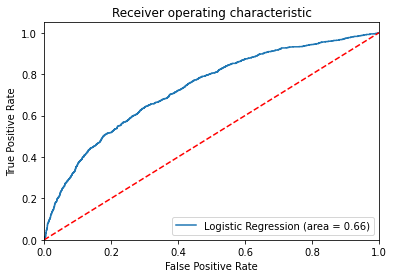

In [66]:
xy_aggregated = xy_predicted_data.groupby(by='id').agg('mean')
xy_aggregated['y_pred'] = (xy_aggregated.y_pred >= 0.5).mul(1)
# xy_aggregated
print_prediction_report(xy_aggregated)

(4079, 3)
(4079, 3)
      target  y_pred_agg  y_pred_proba
id                                    
0        0.0         0.0      0.501993
1        0.0         0.0      0.407410
2        1.0         1.0      0.382584
3        0.0         0.0      0.666882
4        1.0         1.0      0.664578
...      ...         ...           ...
4079     0.0         0.0      0.378400
4080     0.0         0.0      0.418335
4081     0.0         0.0      0.333486
4082     0.0         0.0      0.231820
4083     0.0         0.0      0.677309

[4079 rows x 3 columns]
(4079, 4)
0.0    3005
1.0    1074
Name: target, dtype: int64
[[1688 1317]
 [ 429  645]]
Overall data to predicted class 1 ratio (selectivity): 2.08
Precision of class 1 prediction (precision): 0.33
(initial class 1 probability is 0.26)
Completeness of class 1 prediction (recall): 0.60
              precision    recall  f1-score   support

         0.0       0.80      0.56      0.66      3005
         1.0       0.33      0.60      0.42      1074

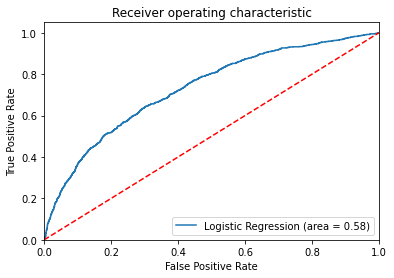

In [67]:
print(xy_aggregated.shape)
xy_aggregated_rnd = pd.DataFrame({
    'target':xy_aggregated.target, 
    'y_pred_agg':xy_aggregated.target,
    'y_pred_proba':xy_aggregated.y_pred_proba
})
print(xy_aggregated_rnd.shape)
print(xy_aggregated_rnd)

xy_aggregated_rnd['rnd'] = np.random.rand(xy_aggregated_rnd.index.size,1)
print(xy_aggregated_rnd.shape)
xy_aggregated_rnd.loc[xy_aggregated_rnd.rnd < xy_aggregated_rnd.y_pred_proba, 'y_pred'] = 1
xy_aggregated_rnd.loc[xy_aggregated_rnd.rnd >= xy_aggregated_rnd.y_pred_proba, 'y_pred'] = 0
# xy_aggregated_rnd
print_prediction_report(xy_aggregated_rnd)

In [68]:
#before oversampling
#[[6345  284]
#[1806  464]]
#macro avg (ROC area) 0.58

## Naive Bayes (feature_50 processing)

In [69]:
hashed_feature = pd.read_csv('hashed_feature.csv')

#Encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#NaN should be encoded as another value
encoded_hashed_feature = hashed_feature
for feature in hashed_feature.columns.difference({'id'}):
    encoded_hashed_feature[feature] = le.fit_transform(hashed_feature[feature].fillna('__NaN__'))
    print(feature + " has been encoded")
#     encoded_hashed_feature.drop(columns=[feature],errors='ignore', inplace=True)   

hashed_feature = pd.merge(encoded_hashed_feature, train, on='id', how='left') \
                        .dropna(how='any')
print('Size: ', len(hashed_feature))
print('Number of NaN: ', len(hashed_feature[~hashed_feature['feature_50'].notna()]))
print('Unique values number: {:d}'.format(hashed_feature['feature_50'].nunique()))

#assume NaN is just another one feature - experimental !!!
hashed_feature_probs = hashed_feature.fillna({'feature_50': 'NaN_substitution'})
print('After NaN imputation\n\rSize : ', len(hashed_feature_probs))
print('Unique values number: {:d}'.format(hashed_feature_probs['feature_50'].nunique()))

hashed_feature_probs = hashed_feature_probs.drop_duplicates()
print('After deduplicating\n\rSize : ', len(hashed_feature_probs))
print('Unique values number: {:d}'.format(hashed_feature_probs['feature_50'].nunique()))

if (hashed_feature_probs[['id', 'feature_50']].groupby('id').nunique() / 
    hashed_feature_probs[['id', 'feature_50']].groupby('id').count()).min().item() < 1:
    print('There are feature duplicates for unique id')
else:
    print('There are not feature duplicates for unique id')
    
print('Minimum entries per feature: ', hashed_feature_probs.groupby('feature_50').size().min())
print('Maximum entries per feature: ', hashed_feature_probs.groupby('feature_50').size().max())

print('Minimum entries per feature: ', hashed_feature_probs.groupby('id').size().min())
print('Maximum entries per feature: ', hashed_feature_probs.groupby('id').size().max())

# print('Shape: ', hashed_data.shape)
# print('Shape w/o NaN: ', hashed_data.dropna(how='any').shape)
# hashed_feature_probs[hashed_feature_probs.id == 0]
hashed_feature_probs

feature_50 has been encoded
Size:  209312
Number of NaN:  0
Unique values number: 4994
After NaN imputation
Size :  209312
Unique values number: 4994
After deduplicating
Size :  209312
Unique values number: 4994
There are not feature duplicates for unique id
Minimum entries per feature:  1
Maximum entries per feature:  2005
Minimum entries per feature:  1
Maximum entries per feature:  957


id  feature_50  target
0          0        2367     0.0
1          0        1404     0.0
2          0        3315     0.0
3          0        1543     0.0
4          0        4180     0.0
...      ...         ...     ...
209307  4083        4426     0.0
209308  4083        3656     0.0
209309  4083        4200     0.0
209310  4083        4372     0.0
209311  4083        4871     0.0

[209312 rows x 3 columns]

In [70]:
train_counts = train[{'id','target'}].groupby(['target']).count()
pt1 = train_counts.loc[1].item()/len(train)
print('P(y=1) = {:.3f}'.format(pt1))

hashed_feature_probs.dropna(inplace=True)
hashed_feature_probs = pd.merge(pd.DataFrame(hashed_feature_probs[hashed_feature_probs['target'] == 1].groupby('feature_50').size(), 
                                columns=['t1_f1'], dtype='float'),
                                pd.DataFrame(hashed_feature_probs[hashed_feature_probs['target'] == 0].groupby('feature_50').size(), 
                                columns=['t0_f1'], dtype='float'),
                                how='outer', on='feature_50')

hashed_feature_probs.reset_index(inplace=True)
hashed_feature_probs.fillna(0, inplace=True)
target1_count = train_counts.loc[1].item()
target0_count = train_counts.loc[0].item()

hashed_feature_probs['pt1_f1'] = hashed_feature_probs['t1_f1']/ \
                                (hashed_feature_probs['t1_f1'] + hashed_feature_probs['t0_f1'])
hashed_feature_probs['d_ptx_f1'] = ( hashed_feature_probs['t1_f1'] + hashed_feature_probs['t0_f1'] )**(-1/2)

hashed_feature_probs['pf1_t1'] = hashed_feature_probs['t1_f1']/ target1_count
hashed_feature_probs['d_pfx_t1'] = target1_count**(-1/2)

hashed_feature_probs['pf1_t0'] = hashed_feature_probs['t0_f1']/ target0_count
hashed_feature_probs['d_pfx_t0'] = target0_count**(-1/2)

#hashed_feature_probs['pt1_f1_min'] = hashed_feature_probs['pt1_f1'] - hashed_feature_probs['delta']
#hashed_feature_probs.loc[hashed_feature_probs.pt1_f1_min < 0, 'pt1_f1_min'] = 0

#hashed_feature_probs['pt0_f1_min'] = 1 - hashed_feature_probs['pt1_f1'] - hashed_feature_probs['delta']
#hashed_feature_probs.loc[hashed_feature_probs.pt1_f1_min < 0, 'pt0_f1_min'] = 0

#hashed_feature_probs = hashed_feature_probs[hashed_feature_probs['pt1_f1_min'] > 0]
#hashed_feature_probs[hashed_feature_probs['feature_50'] == '67e0a489799b834c69777c33ba8f01f5febaa4d6']

P(y=1) = 0.263


In [71]:
hashed_feature_probs

feature_50  t1_f1  t0_f1    pt1_f1  d_ptx_f1    pf1_t1  d_pfx_t1  \
0              0    1.0   10.0  0.090909  0.301511  0.000930    0.0305   
1              1    5.0    4.0  0.555556  0.333333  0.004651    0.0305   
2              2   19.0   29.0  0.395833  0.144338  0.017674    0.0305   
3              3    1.0    2.0  0.333333  0.577350  0.000930    0.0305   
4              4    2.0   11.0  0.153846  0.277350  0.001860    0.0305   
...          ...    ...    ...       ...       ...       ...       ...   
4989        4973    0.0    4.0  0.000000  0.500000  0.000000    0.0305   
4990        4978    0.0    1.0  0.000000  1.000000  0.000000    0.0305   
4991        5002    0.0    2.0  0.000000  0.707107  0.000000    0.0305   
4992        5003    0.0    1.0  0.000000  1.000000  0.000000    0.0305   
4993        5008    0.0    2.0  0.000000  0.707107  0.000000    0.0305   

        pf1_t0  d_pfx_t0  
0     0.003323   0.01823  
1     0.001329   0.01823  
2     0.009638   0.01823  
3     0.000665   0.01823  
4     0.003656   0.01823  
...        ...       ...  
4989  0.001329   0.01823  
4990  0.000332   0.01823  
4991  0.000665   0.01823  
4992  0.000332   0.01823  
4993  0.000665   0.01823  

[4994 rows x 9 columns]

In [72]:
train['y_predict_proba'] = pt1
#print(train[train['id'].isin(hashed_feature[hashed_feature['feature_50'] == '000063d721c1f034be95d0208c9b695ae4c4a7ff'].id)])
for f in hashed_feature_probs['feature_50']:
#     print(f)
# for f in hashed_feature_probs[hashed_feature_probs.id == 0].feature_50:
#     print(f)
#     feature_50 == f
    pf1_t1 = hashed_feature_probs.loc[hashed_feature_probs.feature_50 == f].pf1_t1.item()
    pf1_t0 = hashed_feature_probs.loc[hashed_feature_probs.feature_50 == f].pf1_t0.item()
    ids = hashed_feature[hashed_feature['feature_50'] == f].id
#    %timeit ids = hashed_feature.loc[hashed_feature['feature_50'] == f, 'id']
#    print(ids)
    trn = train[train['id'].isin(ids)].y_predict_proba
#    print(trn)
#    print(trn.shape)
    
    trn2 = trn * pf1_t1 / (trn * pf1_t1 + (1 - trn) * pf1_t0)
#    print(hashed_feature_probs.loc[hashed_feature_probs.feature_50 == f].pf1_t1.item())
#    train.loc[train['id'].isin(ids),'y_predict_proba'] = hashed_feature_probs.loc[hashed_feature_probs.feature_50 == f].pf1_t1.item()
#    print(train[train['id'].isin(hashed_feature[hashed_feature['feature_50'] == '000063d721c1f034be95d0208c9b695ae4c4a7ff'].id)])
#    print(trn)
    train.loc[train['id'].isin(ids),'y_predict_proba'] = trn2

    # feature_50 != f
    ids = hashed_feature[hashed_feature['feature_50'] != f].id
    trn = train[train['id'].isin(ids)]
    trn2 = trn * (1 - pf1_t1) / ( trn * (1 - pf1_t1) + (1 - trn) * (1 - pf1_t0) )
    train.loc[train['id'].isin(ids),'y_predict_proba'] = trn2

train['rnd'] = pd.DataFrame(np.random.rand(len(train.index),1))
train.loc[train.rnd < train.y_predict_proba, 'y_pred_rnd'] = 1
train.loc[train.rnd >= train.y_predict_proba, 'y_pred_rnd'] = 0

train.loc[train.y_predict_proba >= 0.5, 'y_predict'] = 1
train.loc[train.y_predict_proba < 0.5, 'y_predict'] = 0

#print(train[train['id'].isin(hashed_feature[hashed_feature['feature_50'] == '47904b3331202e9881d003ff449c2eabfbc75460'].id)])
train.head()

id  target  y_predict_proba       rnd  y_pred_rnd  y_predict
0   0       0     9.373017e-16  0.613779         0.0        0.0
1   1       0     3.540631e-11  0.883878         0.0        0.0
2   2       1     3.236819e-13  0.053026         0.0        0.0
3   3       0     2.605090e-17  0.338416         0.0        0.0
4   4       1     9.809421e-01  0.196882         1.0        1.0

In [73]:
train.loc[train.y_predict_proba >= 0.5, 'y_predict'] = 1
train.loc[train.y_predict_proba < 0.5, 'y_predict'] = 0
trn = train[['target','y_predict','y_pred_rnd','y_predict_proba']].dropna()
trn

target  y_predict  y_pred_rnd  y_predict_proba
0          0        0.0         0.0     9.373017e-16
1          0        0.0         0.0     3.540631e-11
2          1        0.0         0.0     3.236819e-13
3          0        0.0         0.0     2.605090e-17
4          1        1.0         1.0     9.809421e-01
...      ...        ...         ...              ...
4079       0        0.0         0.0     5.197462e-14
4080       0        0.0         0.0     4.530642e-18
4081       0        0.0         0.0     1.833467e-16
4082       0        0.0         0.0     0.000000e+00
4083       0        0.0         0.0     4.494214e-02

[4022 rows x 4 columns]

0    2947
1    1075
Name: target, dtype: int64
[[2551  396]
 [ 572  503]]
Overall data to predicted class 1 ratio (selectivity): 4.47
Precision of class 1 prediction (precision): 0.56
(initial class 1 probability is 0.27)
Completeness of class 1 prediction (recall): 0.47
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2947
           1       0.56      0.47      0.51      1075

    accuracy                           0.76      4022
   macro avg       0.69      0.67      0.68      4022
weighted avg       0.75      0.76      0.75      4022



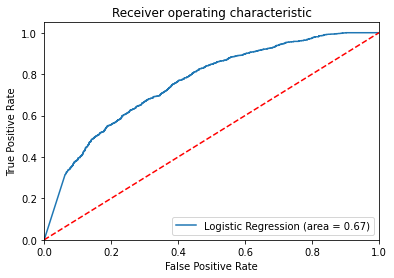

In [74]:
#X = (np.asarray(train['feature_0'])).reshape(-1, 1)
Y = (np.asarray(trn['target'])).ravel()
y_predict_proba = trn['y_predict_proba']
y_predict = trn['y_predict']

print_prediction_report(pd.DataFrame({'target':trn.target, 
                                      'y_pred':trn.y_predict, 
                                      'y_pred_proba':trn.y_predict_proba}))

# from sklearn.metrics import confusion_matrix
# conf_mx = confusion_matrix(Y, y_predict)
# print('Confusion matrix [[tp,fp], [fn,tn]]: \n', conf_mx)

# from sklearn.metrics import classification_report
# print(classification_report(Y, y_predict))

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(Y, y_predict)
# fpr, tpr, thresholds = roc_curve(Y, y_predict_proba)
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

0.0    3005
1.0    1074
Name: target, dtype: int64
[[1637 1368]
 [ 193  881]]
Overall data to predicted class 1 ratio (selectivity): 1.81
Precision of class 1 prediction (precision): 0.39
(initial class 1 probability is 0.26)
Completeness of class 1 prediction (recall): 0.82
              precision    recall  f1-score   support

         0.0       0.89      0.54      0.68      3005
         1.0       0.39      0.82      0.53      1074

    accuracy                           0.62      4079
   macro avg       0.64      0.68      0.60      4079
weighted avg       0.76      0.62      0.64      4079



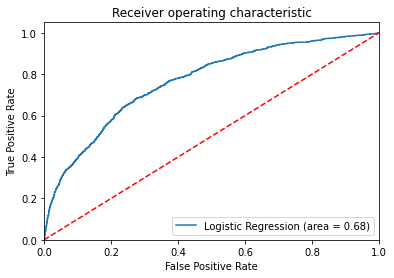

In [75]:
xy_total = xy_aggregated.join(trn[{'y_predict','y_predict_proba'}], how='left', on='id')
xy_total['y_pred_total'] = xy_total[{'y_predict','y_pred'}].agg('max', axis=1)
xy_total['y_pred_proba_total'] = xy_total[{'y_predict_proba','y_pred_proba'}].agg('mean', axis=1)
# xy_total = xy_total.append(xy_total[xy_total.target == 1])
# xy_total = xy_total.append(xy_total[xy_total.target == 1])

print_prediction_report(pd.DataFrame({'target':xy_total.target, 
                                      'y_pred':xy_total.y_pred_total, 
                                      'y_pred_proba':xy_total.y_pred_proba_total}))

In [76]:
TODO
- обїединить с aggregated

SyntaxError: invalid syntax (<ipython-input-76-29f6fec97f1c>, line 2)